/Users/saumikdana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


https://finance.yahoo.com/calendar/earnings/?day=2024-07-03&offset=0&size=100


/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://finance.yahoo.com/calendar/earnings/?day=2024-07-03&offset=100&size=100


/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ticker_data = pd.concat(ticker_data_list, ignore_index=True)


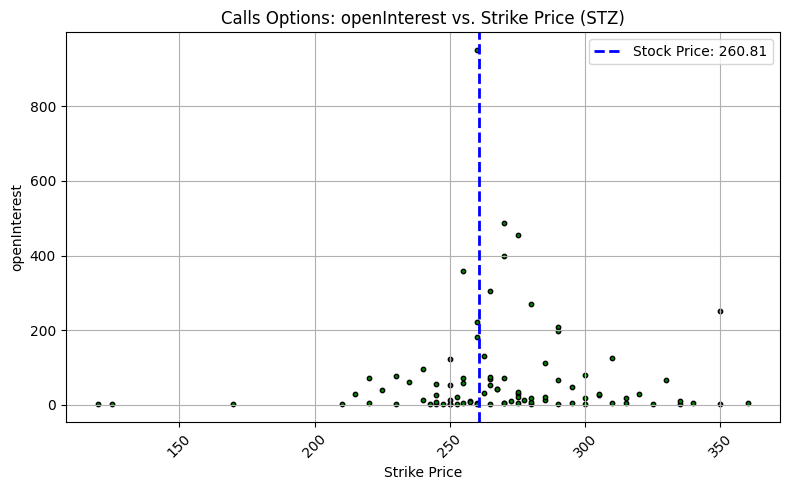

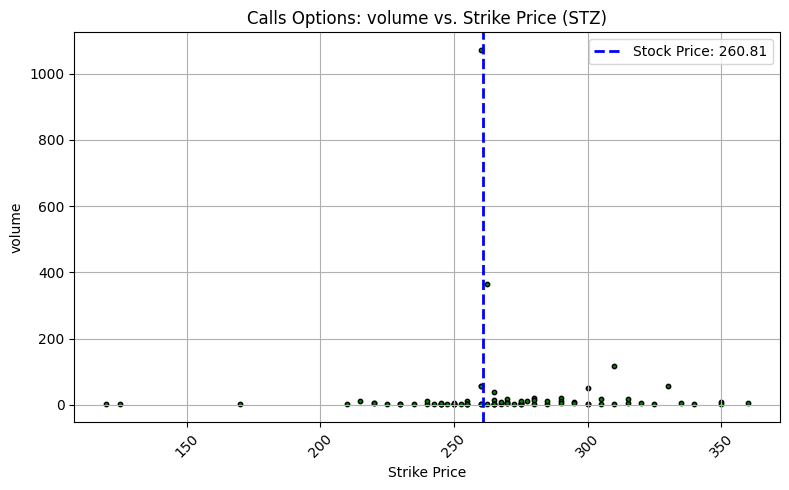

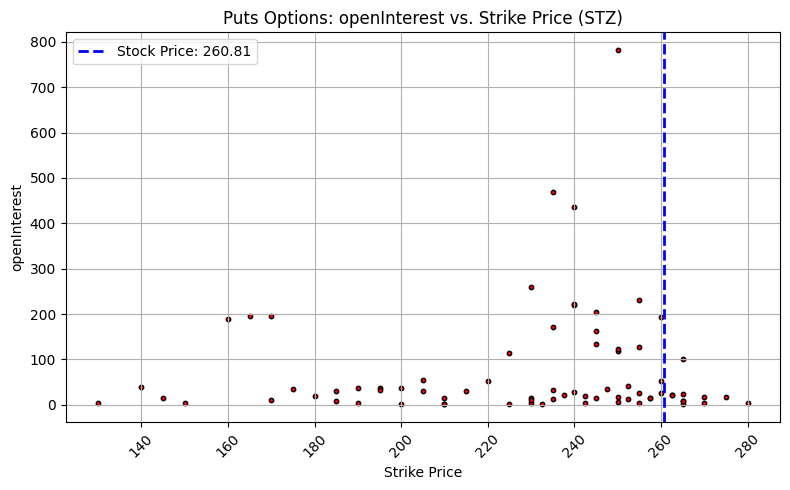

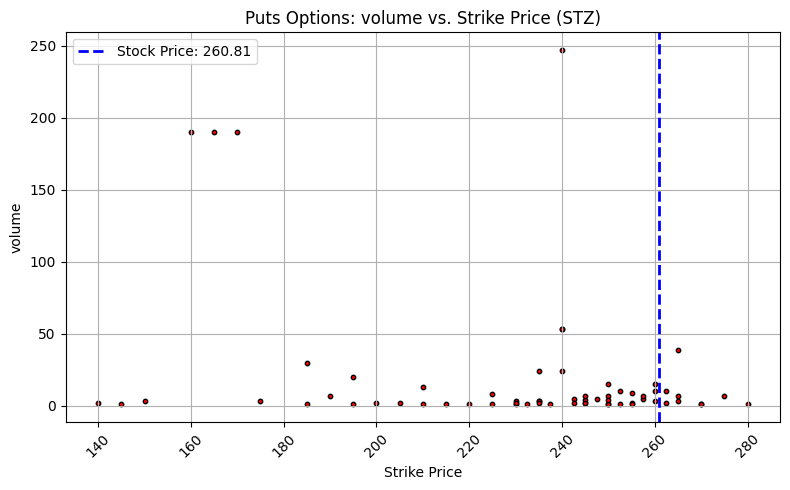

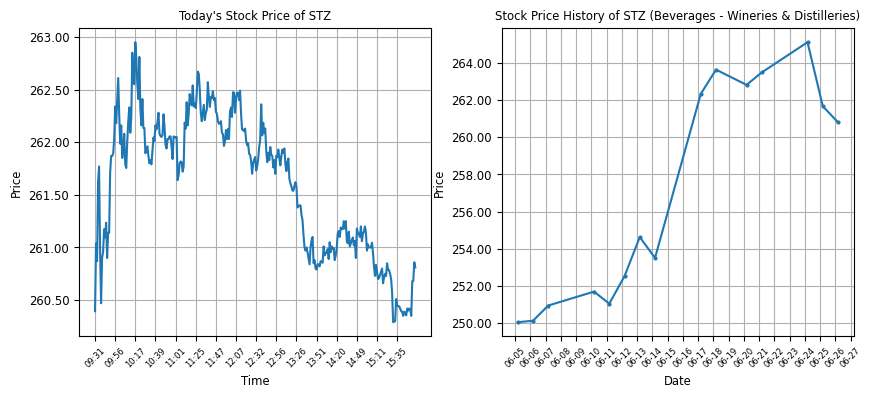

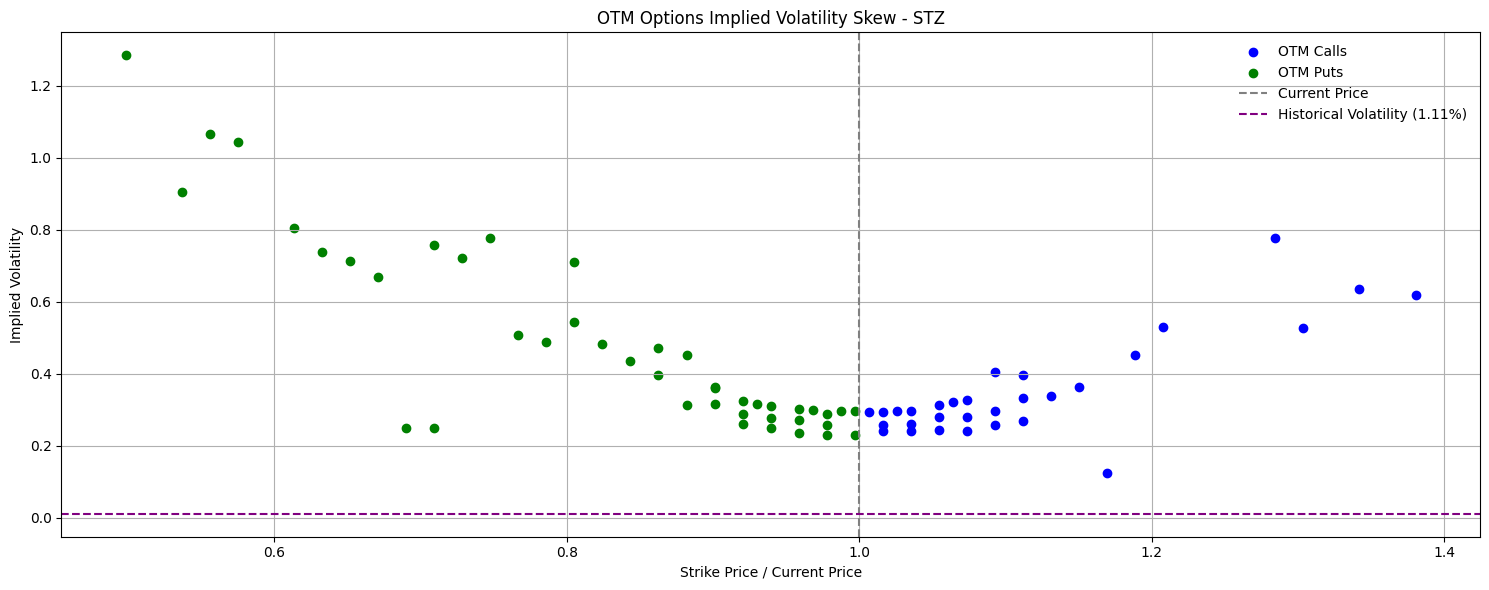

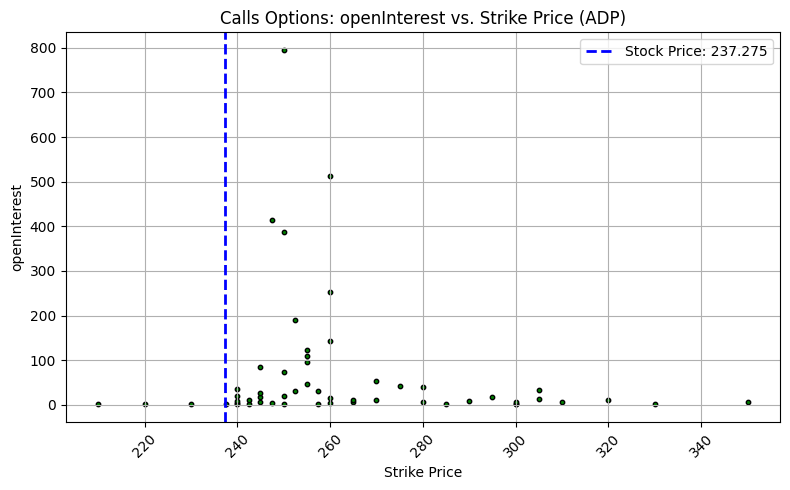

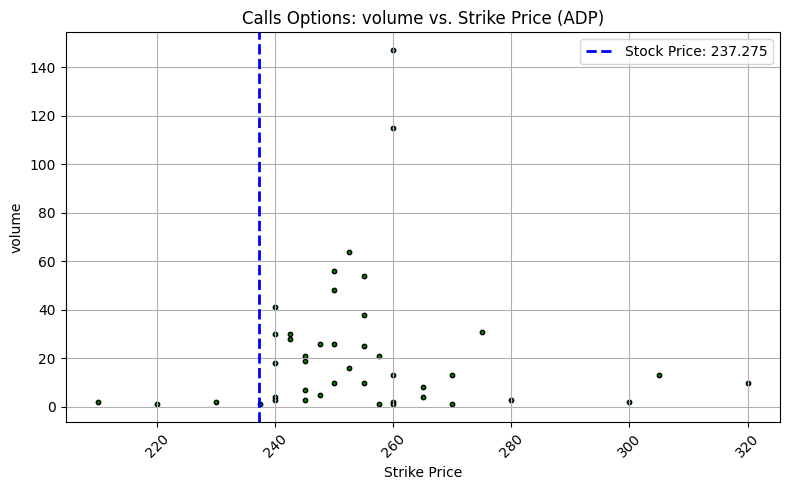

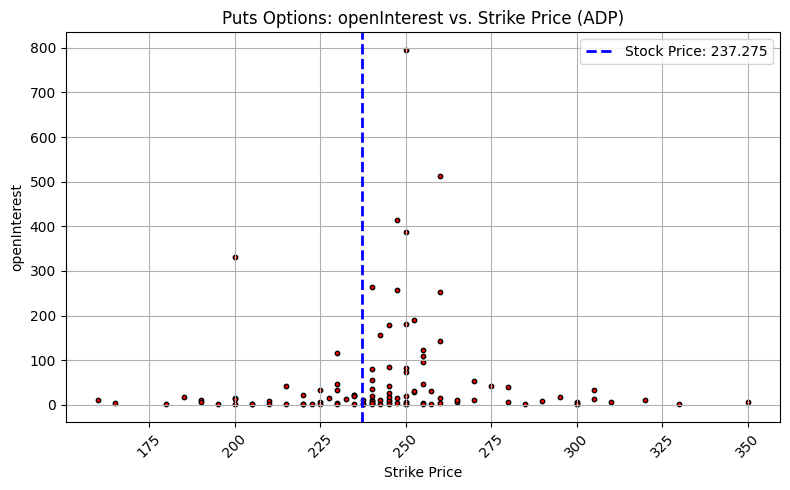

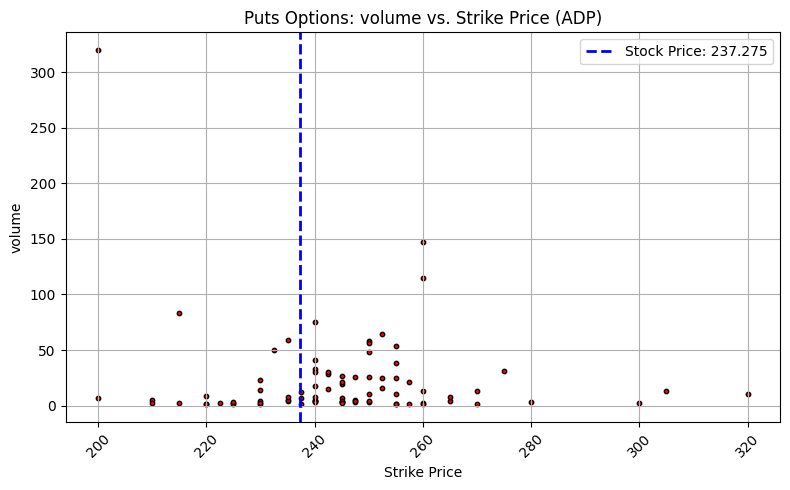

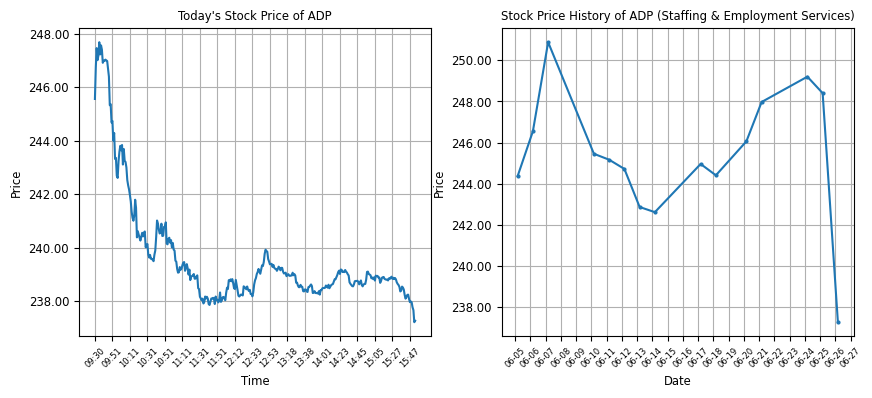

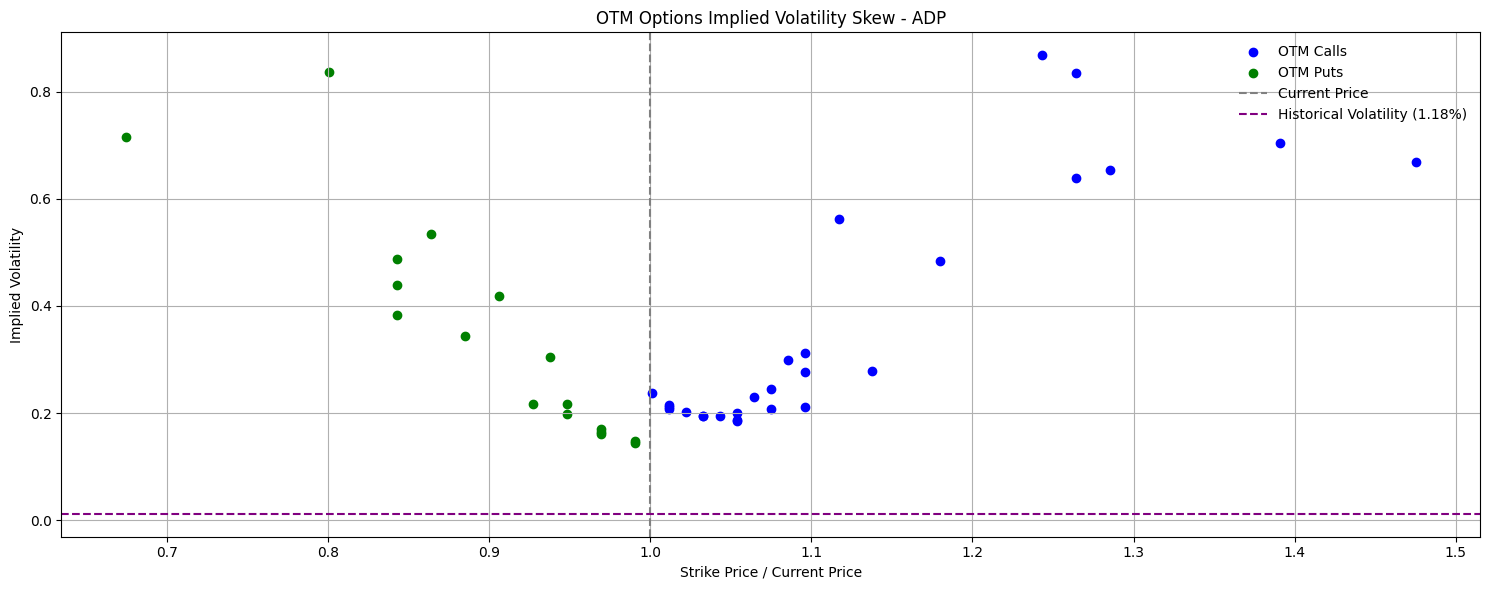

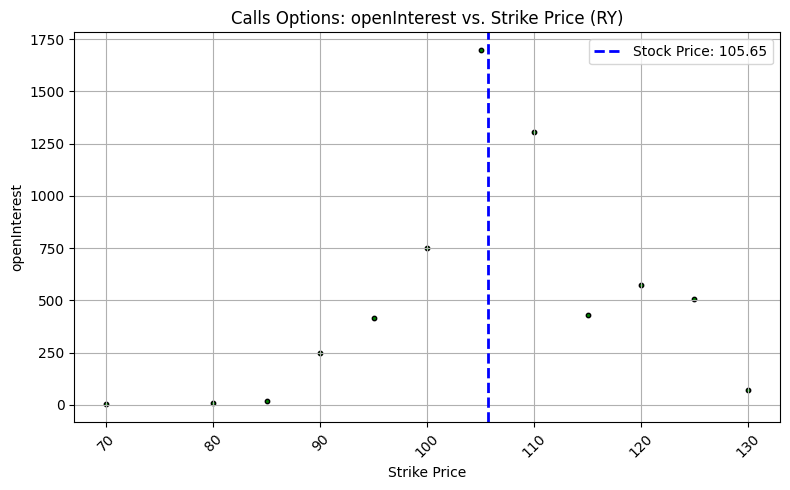

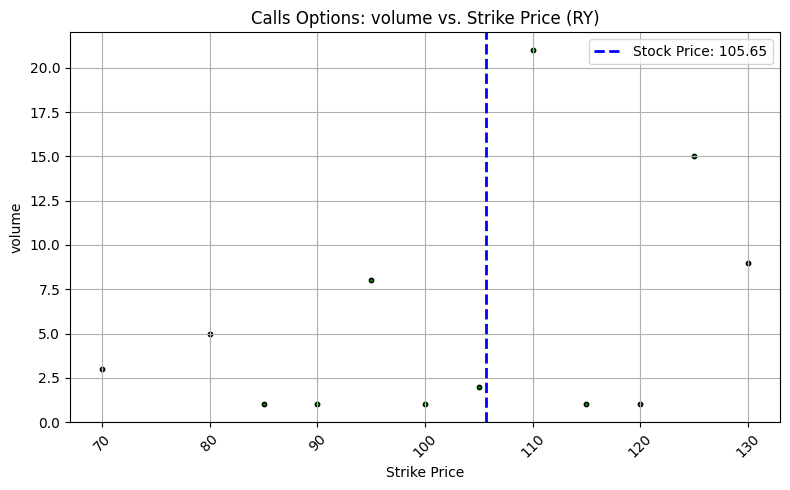

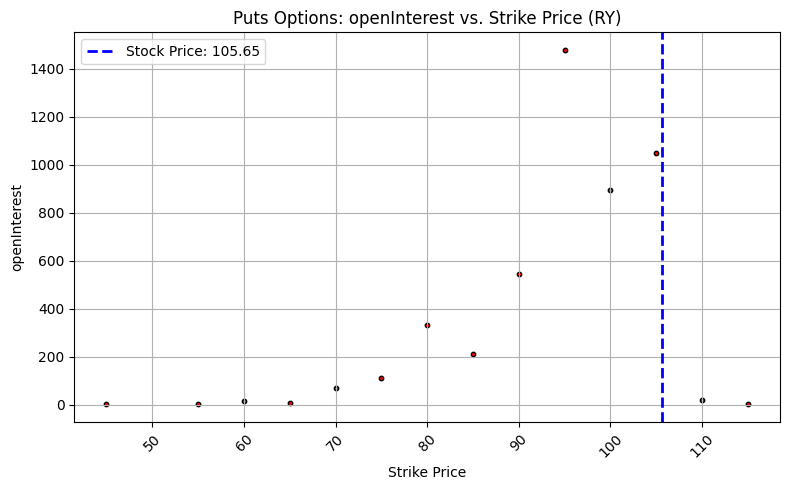

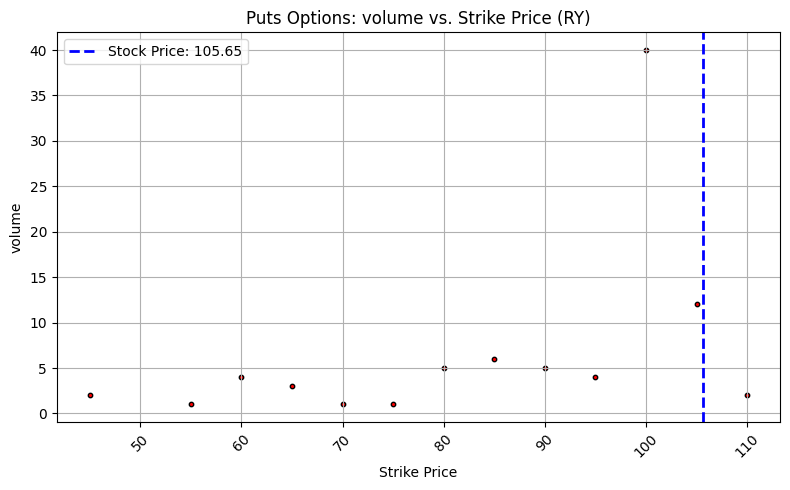

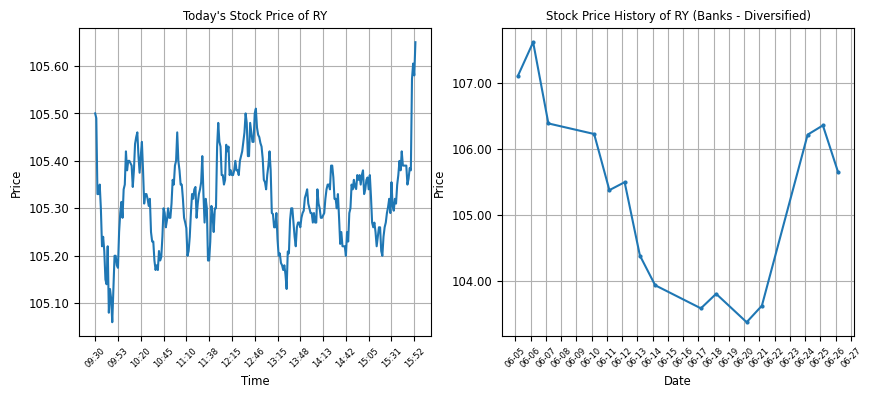

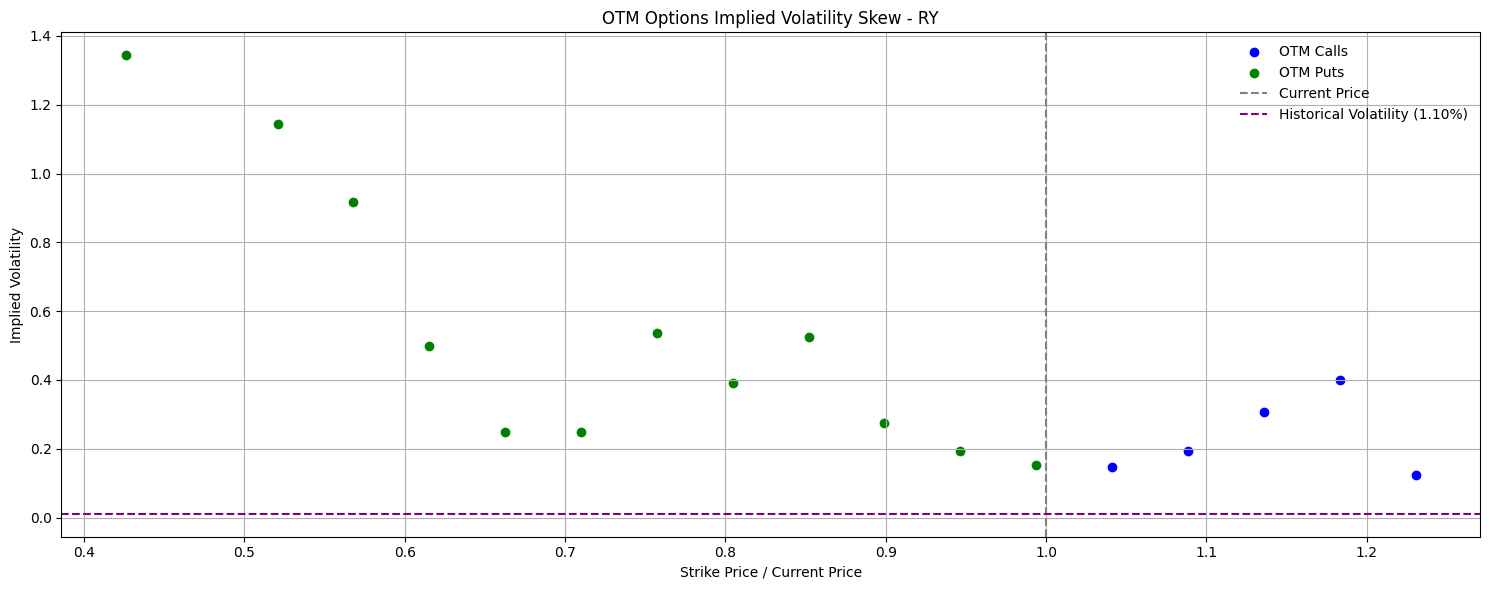

$VLPNF: possibly delisted; No price data found  (period=1d)


$VLPNF: possibly delisted; No price data found  (period=1d)


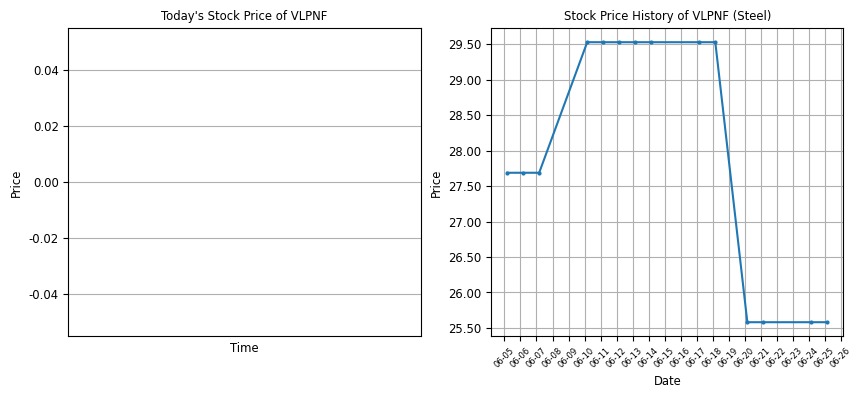

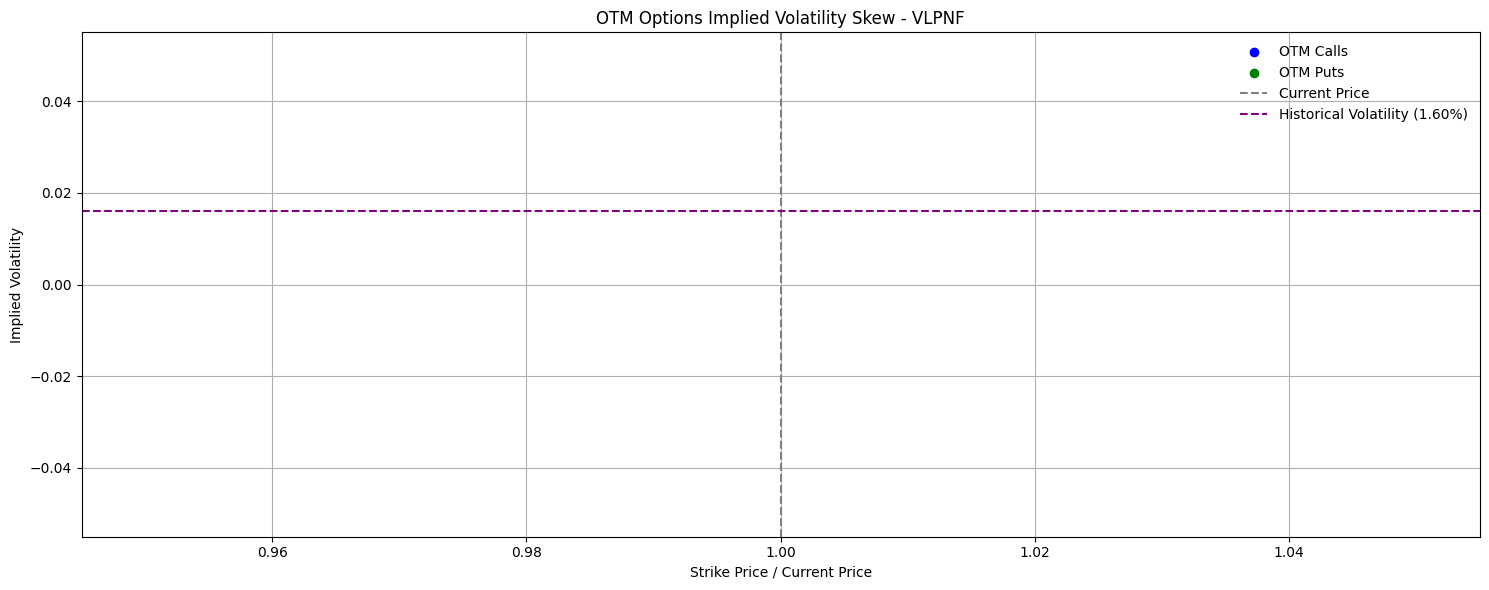

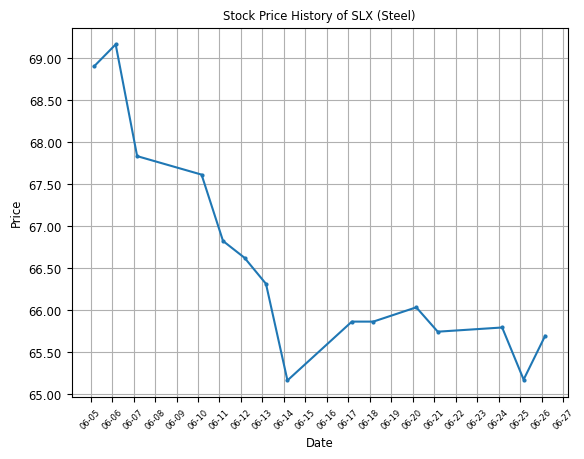

$AMKYF: possibly delisted; No price data found  (period=1d)


$AMKYF: possibly delisted; No price data found  (period=1d)


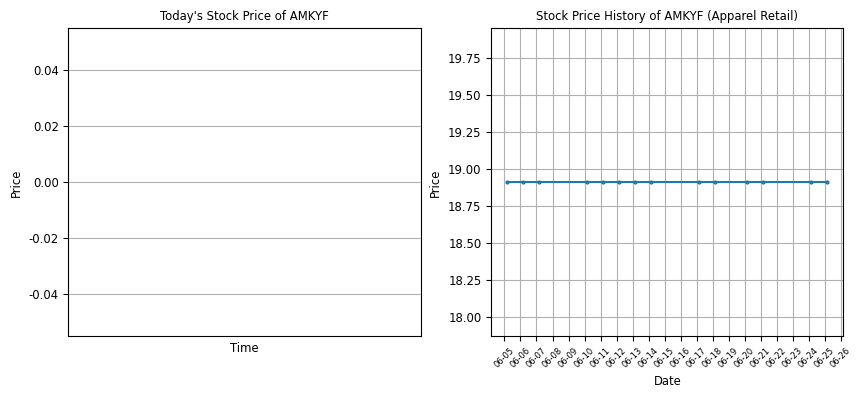

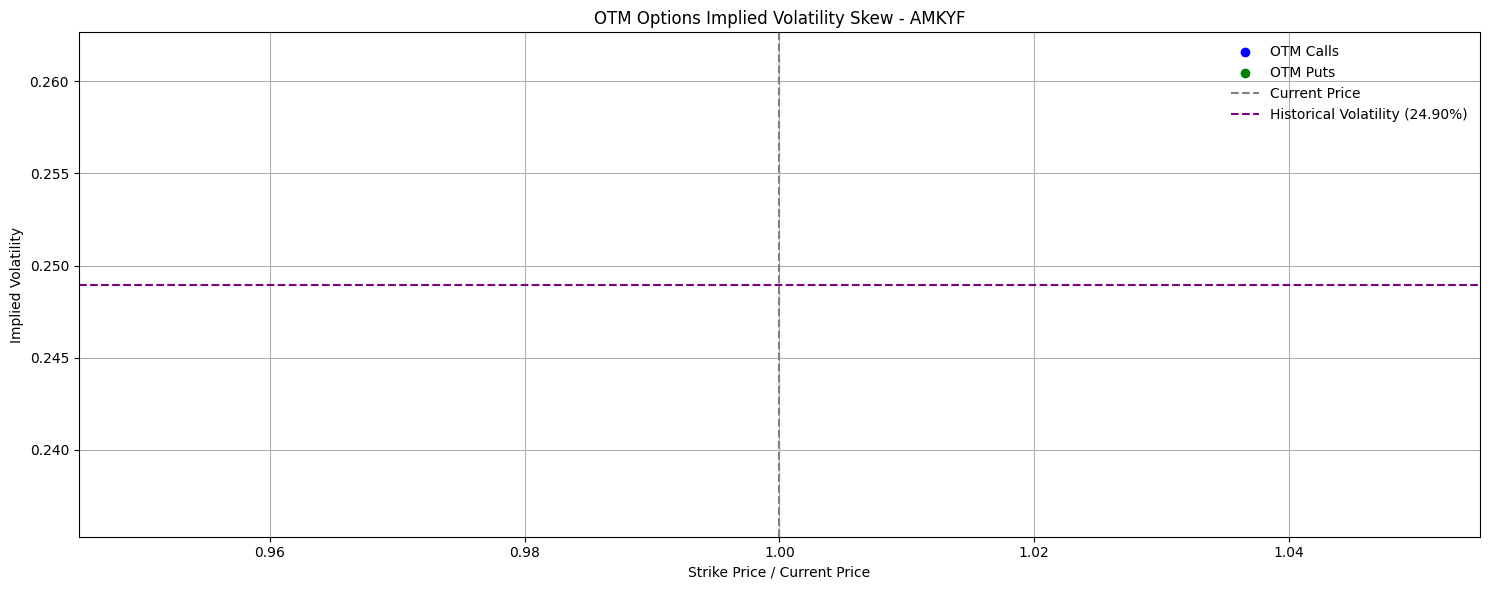

$RYLBF: possibly delisted; No price data found  (period=1d)


$RYLBF: possibly delisted; No price data found  (period=1d)


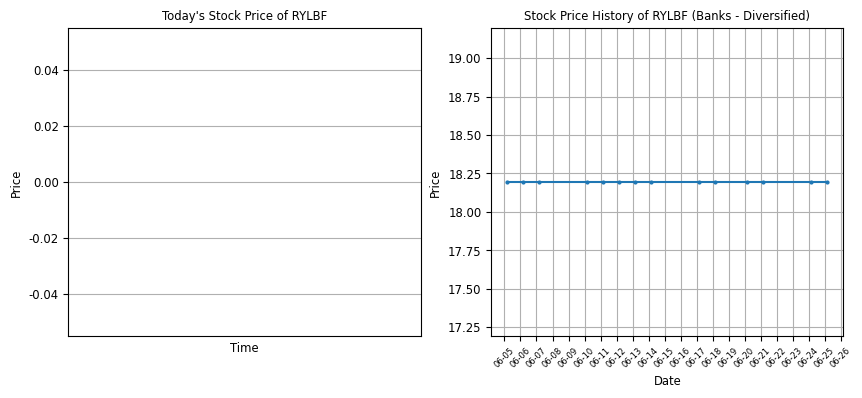

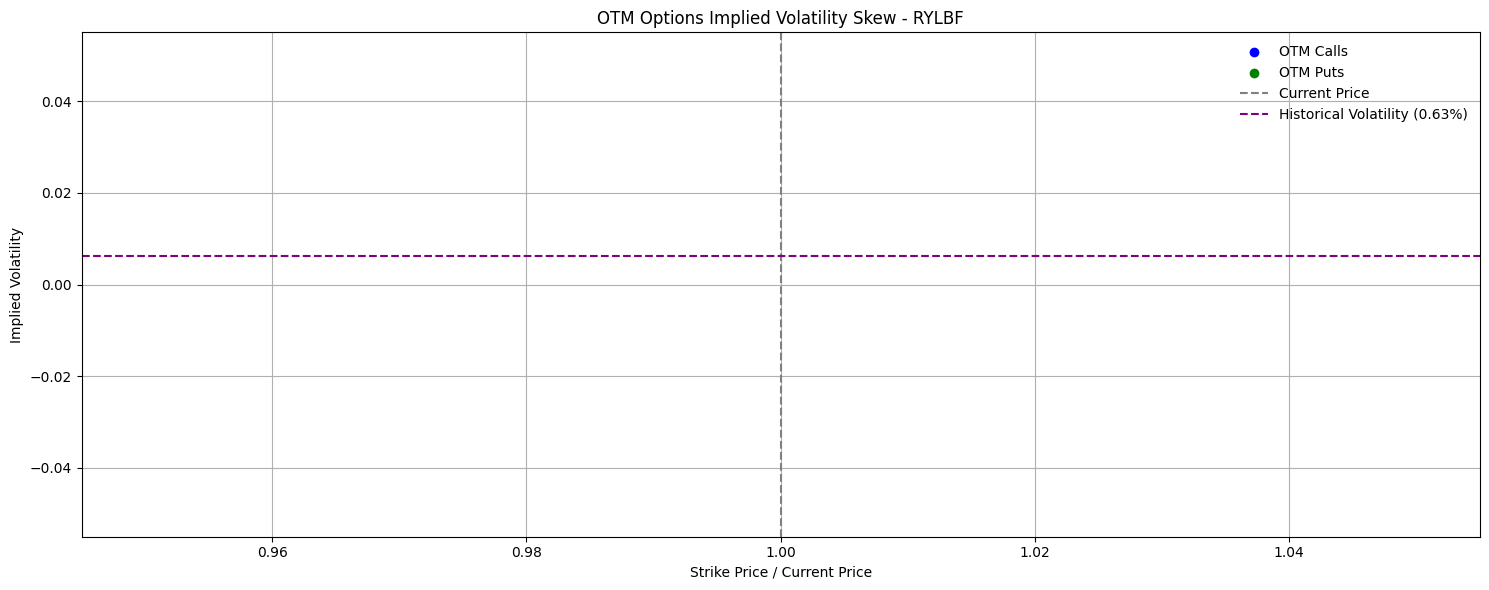

$RBCPF: possibly delisted; No price data found  (period=1d)


$RBCPF: possibly delisted; No price data found  (period=1d)


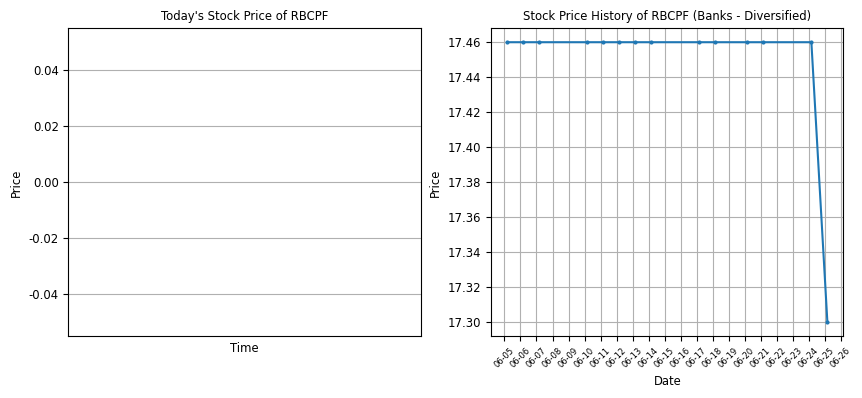

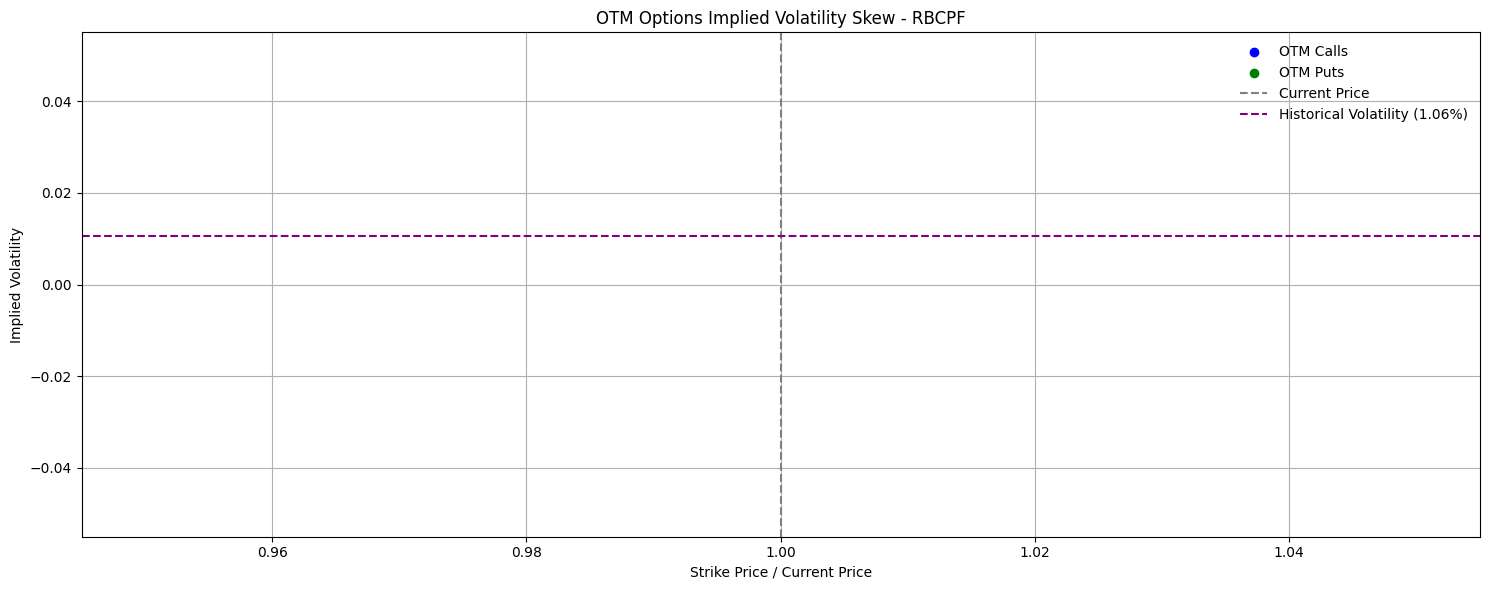

$AARTY: possibly delisted; No price data found  (period=1d)


$AARTY: possibly delisted; No price data found  (period=1d)


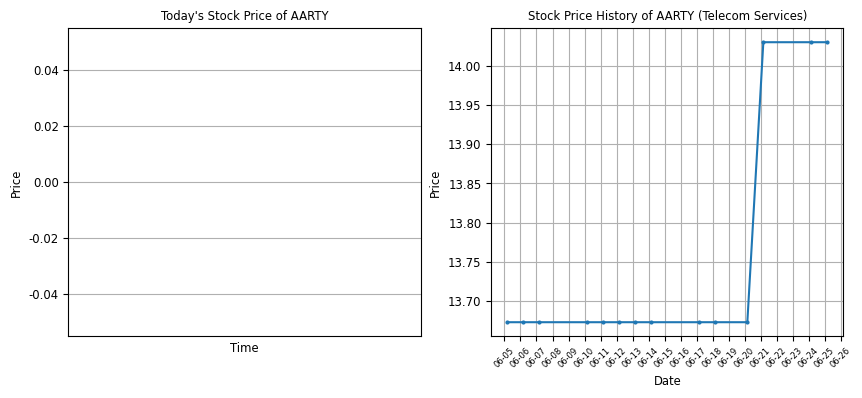

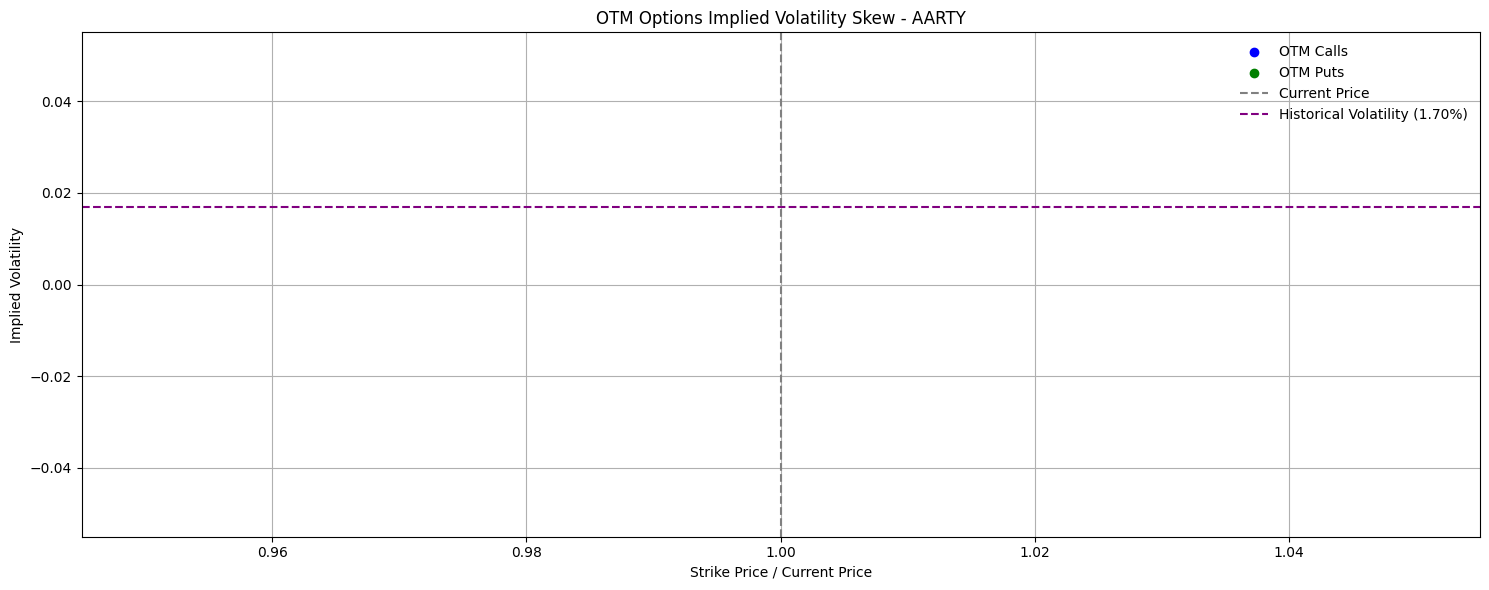

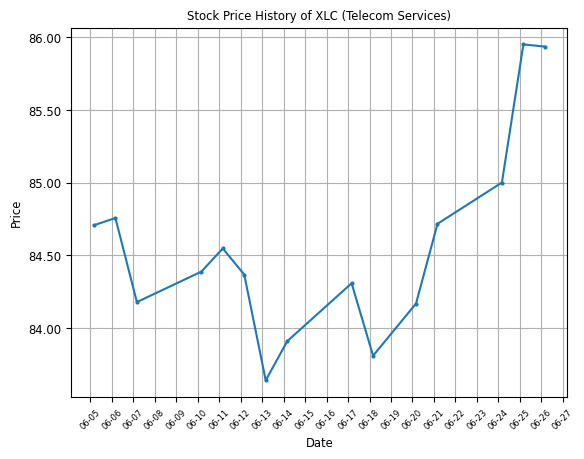

$MANZF: possibly delisted; No price data found  (period=1d)


$MANZF: possibly delisted; No price data found  (period=1d)


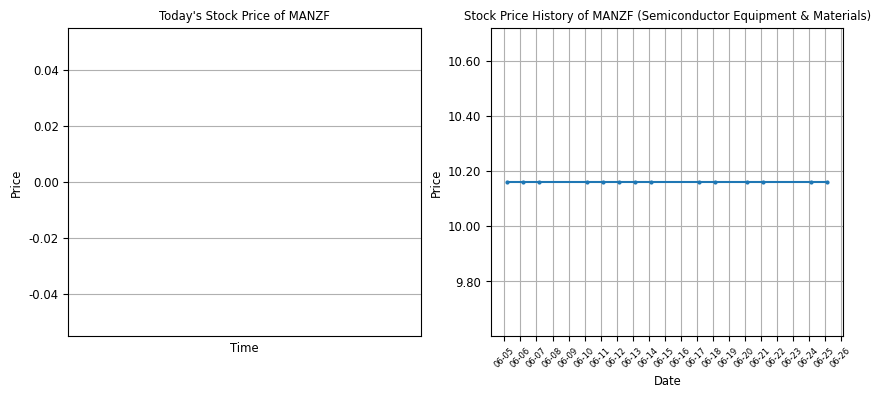

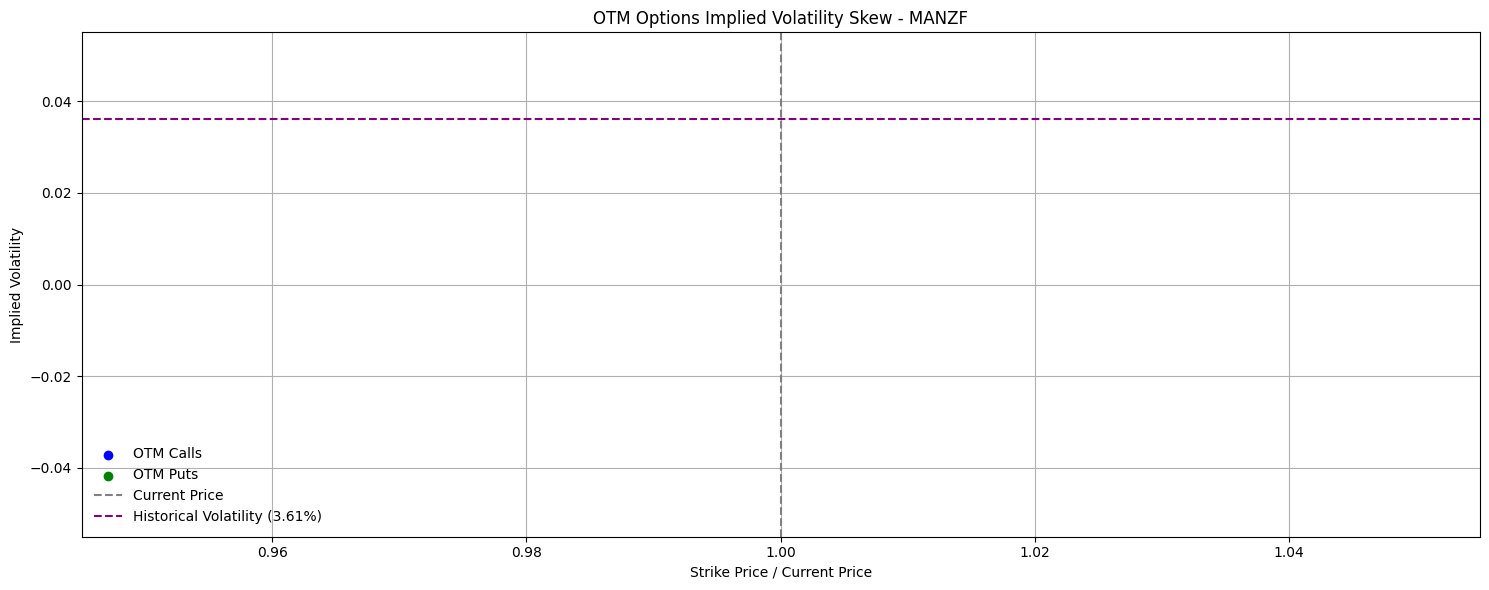

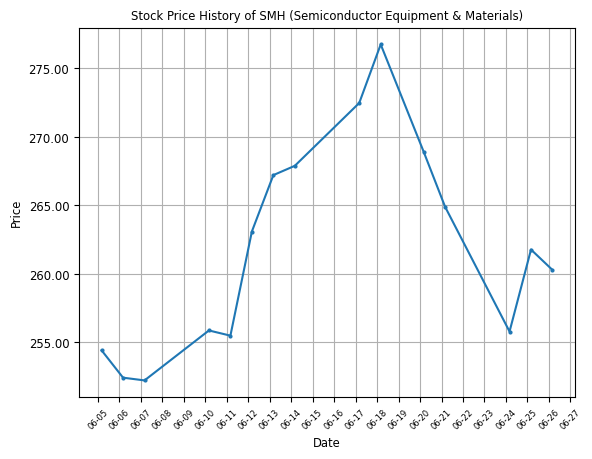

$MAKSY: possibly delisted; No price data found  (period=1d)


$MAKSY: possibly delisted; No price data found  (period=1d)


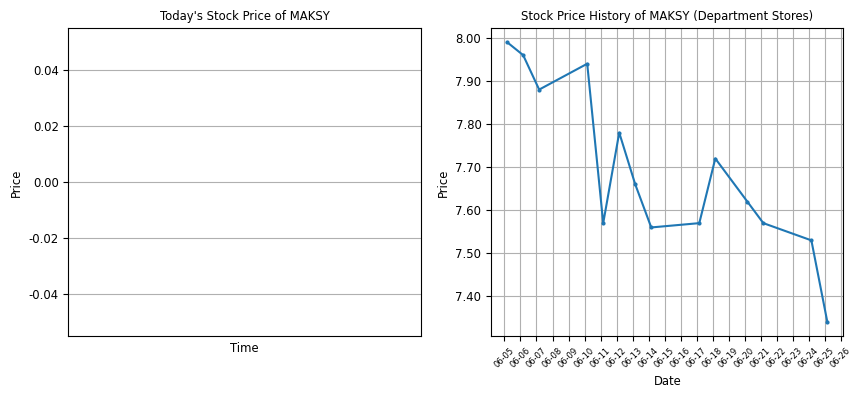

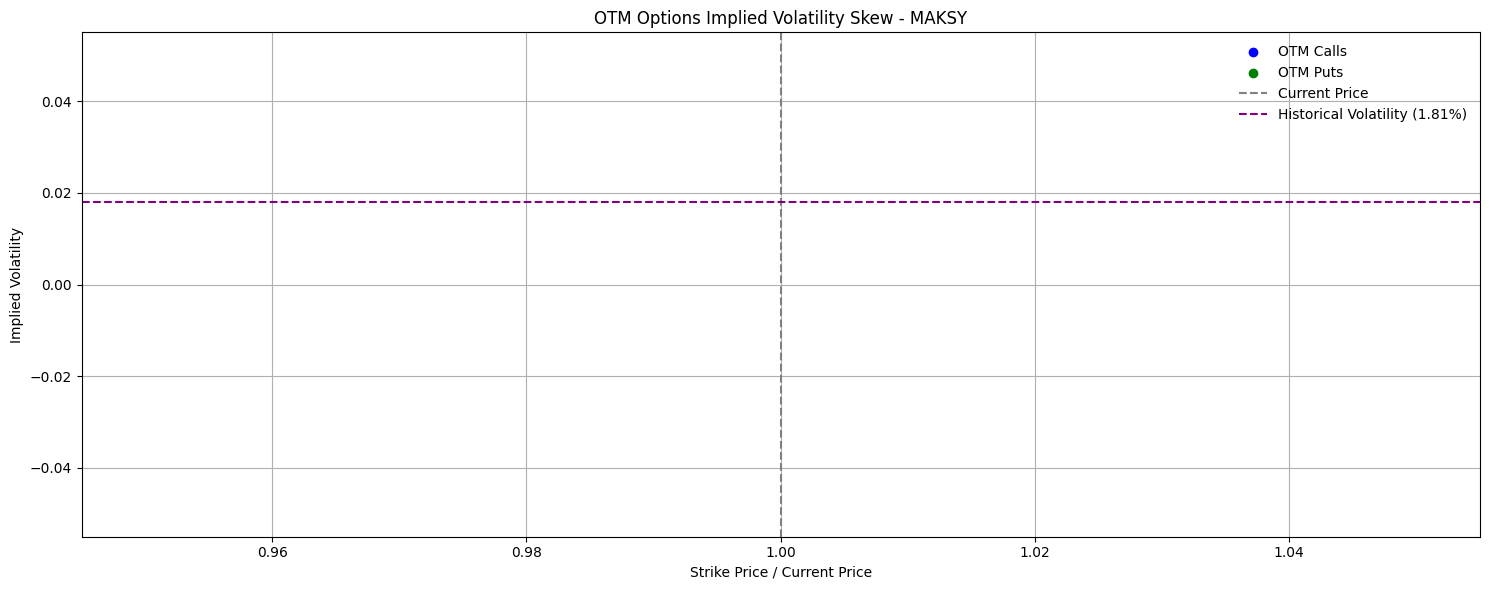

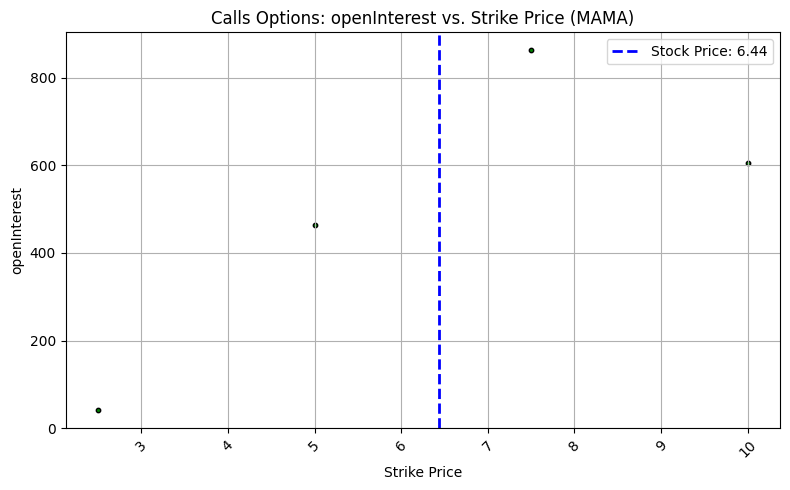

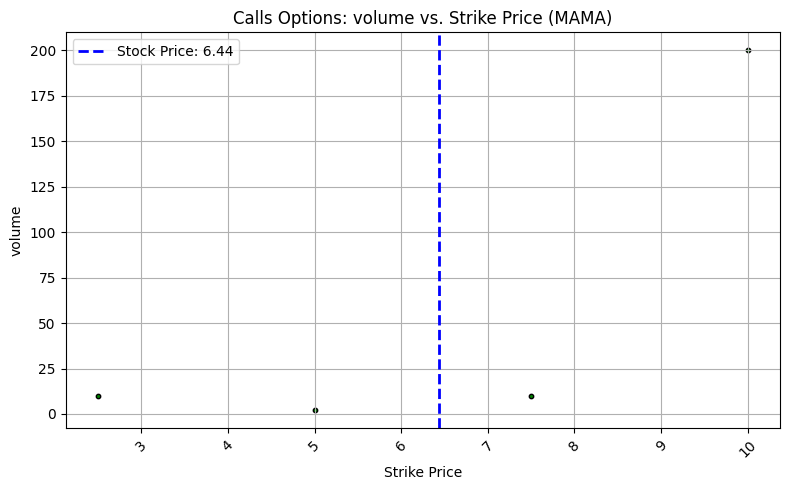

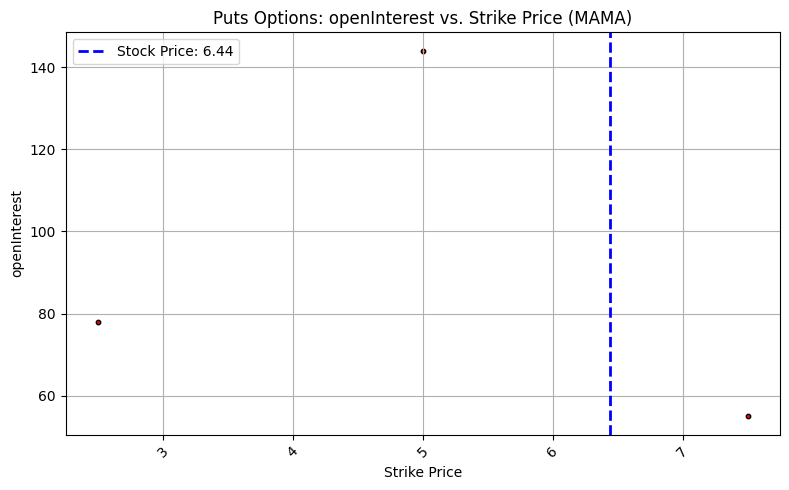

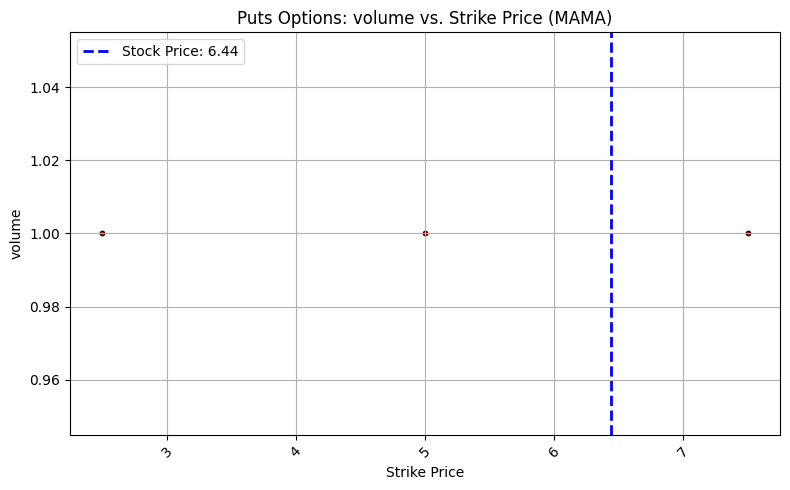

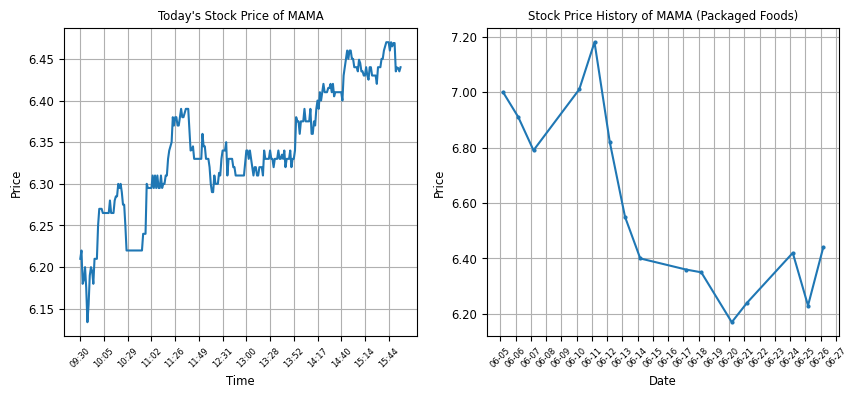

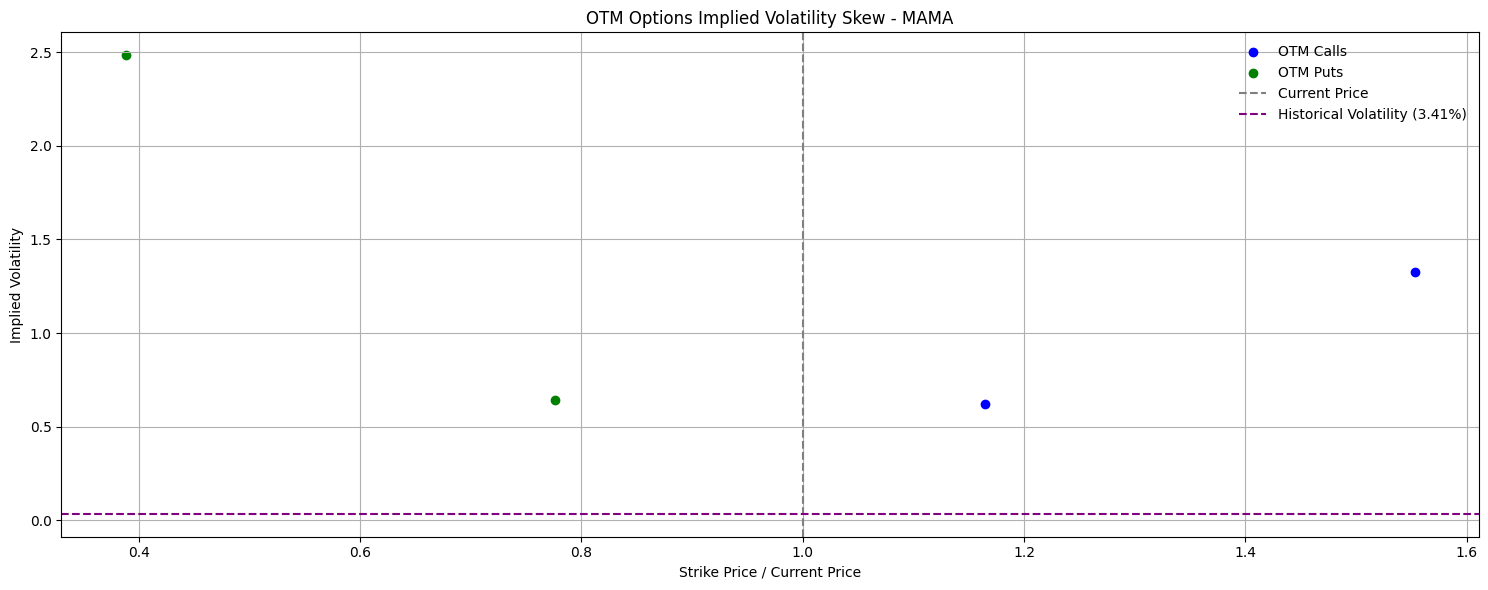

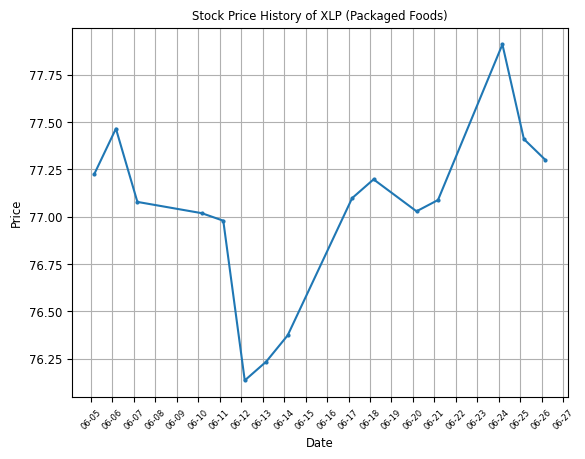

$BRAGF: possibly delisted; No price data found  (period=1d)


$BRAGF: possibly delisted; No price data found  (period=1d)


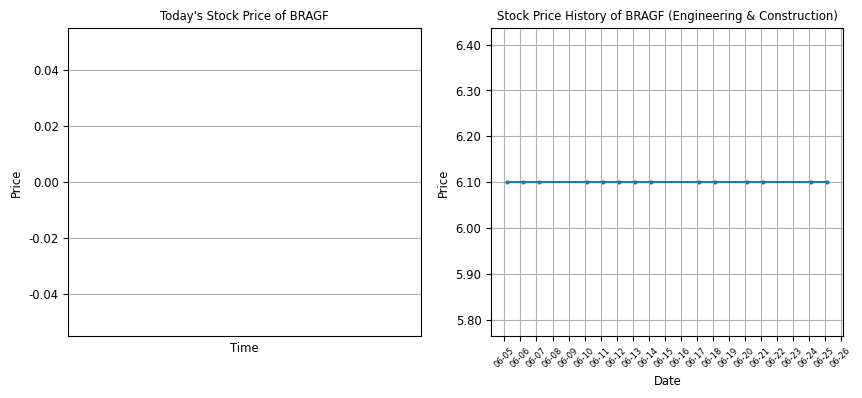

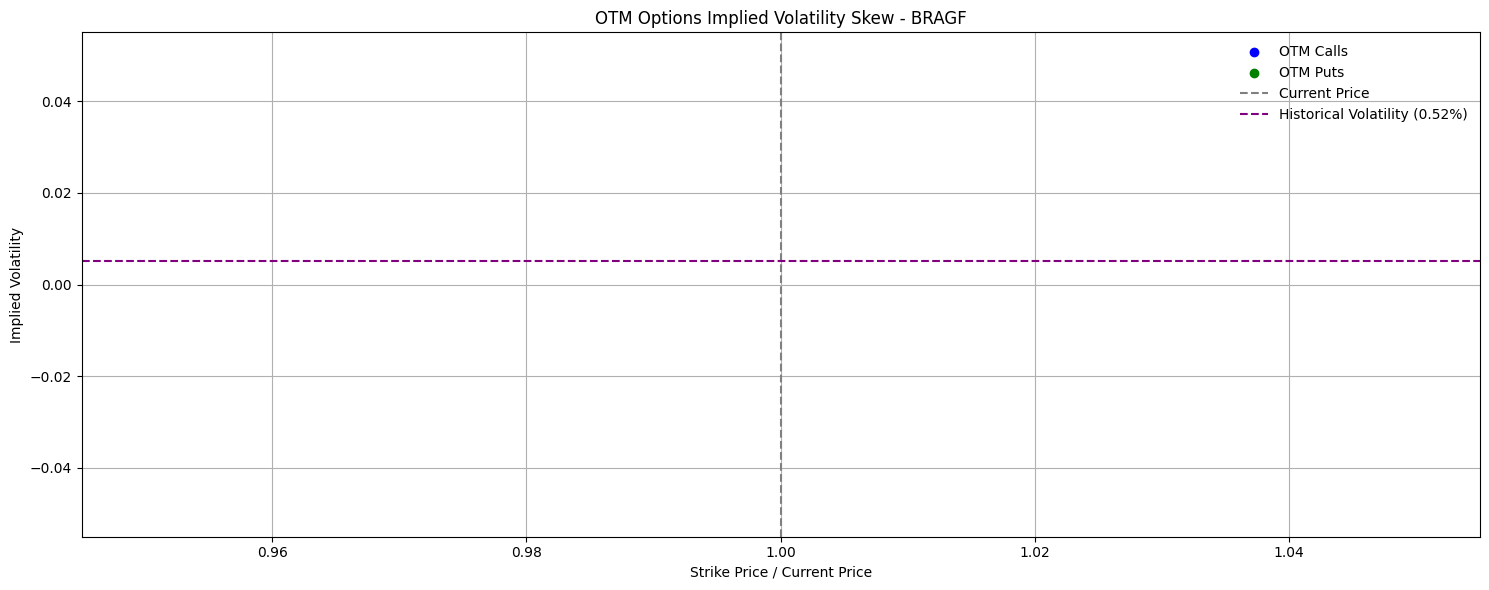

$VLPNY: possibly delisted; No price data found  (period=1d)


$VLPNY: possibly delisted; No price data found  (period=1d)


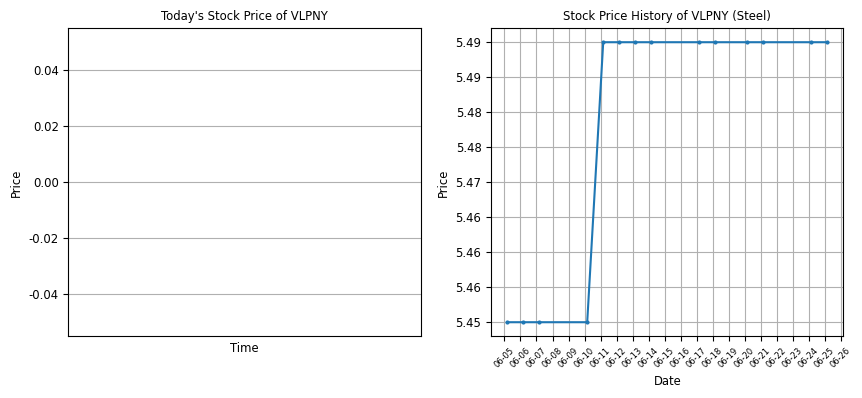

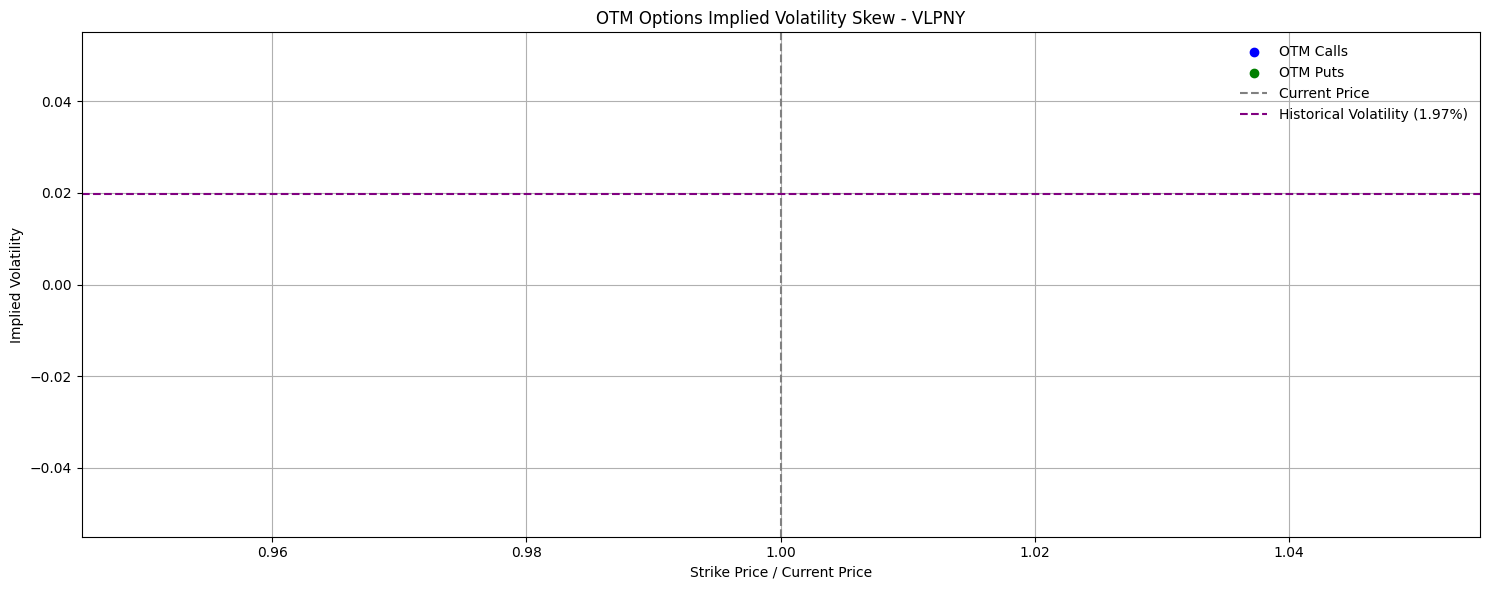

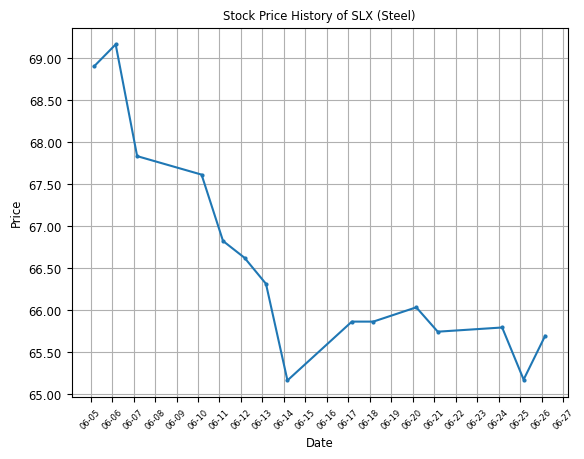

$ZMTBY: possibly delisted; No price data found  (period=1d)


$ZMTBY: possibly delisted; No price data found  (period=1d)


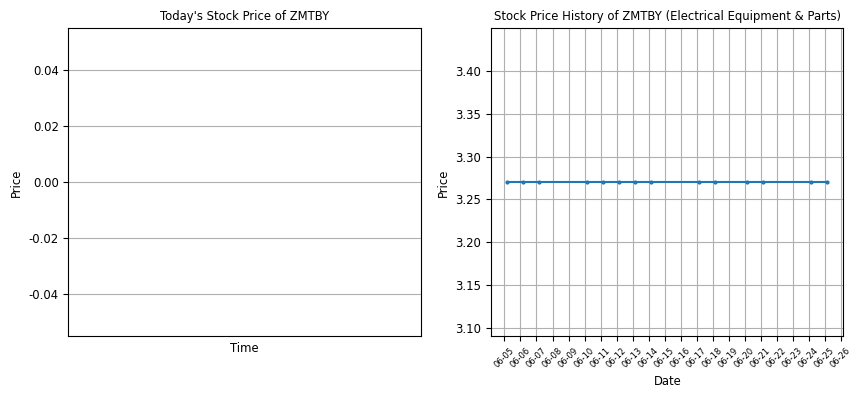

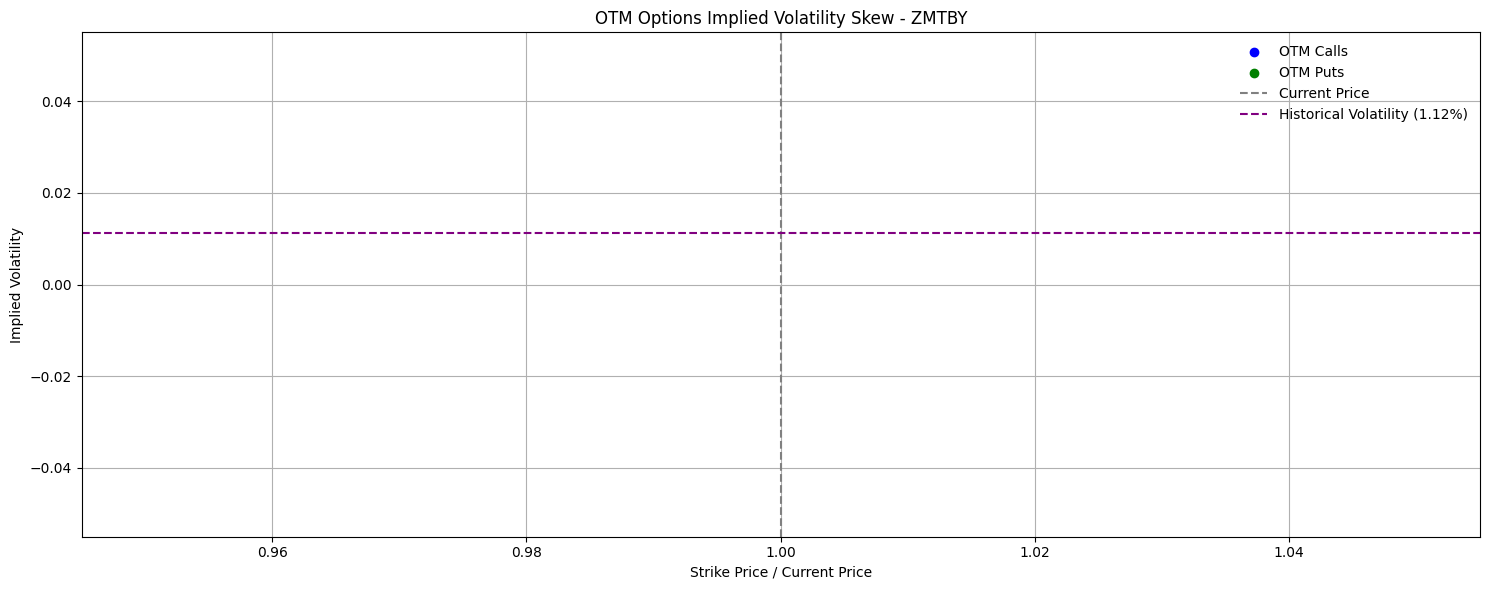

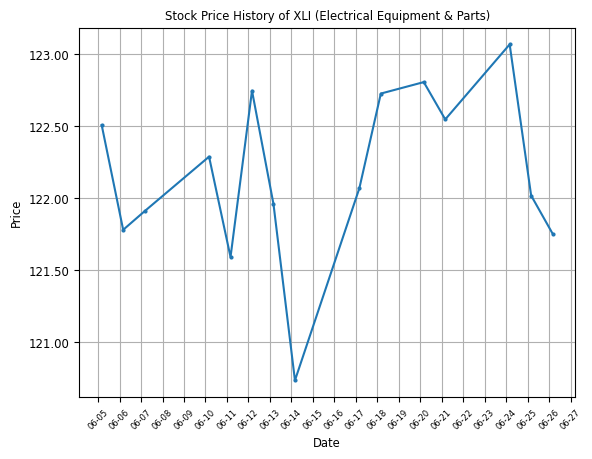

$MAKSF: possibly delisted; No price data found  (period=1d)


$MAKSF: possibly delisted; No price data found  (period=1d)


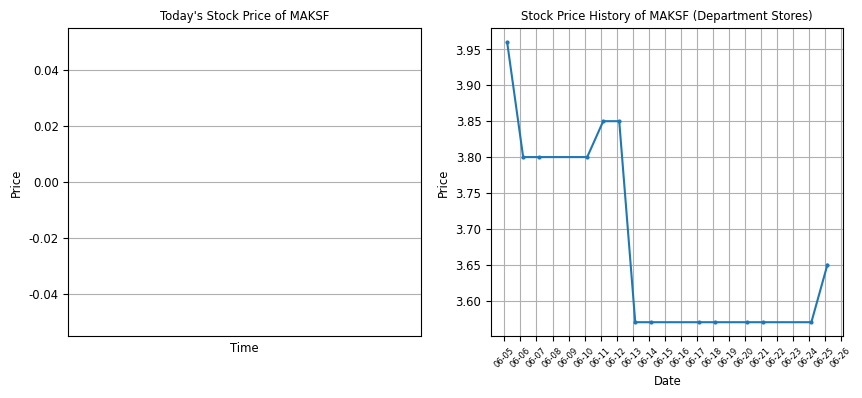

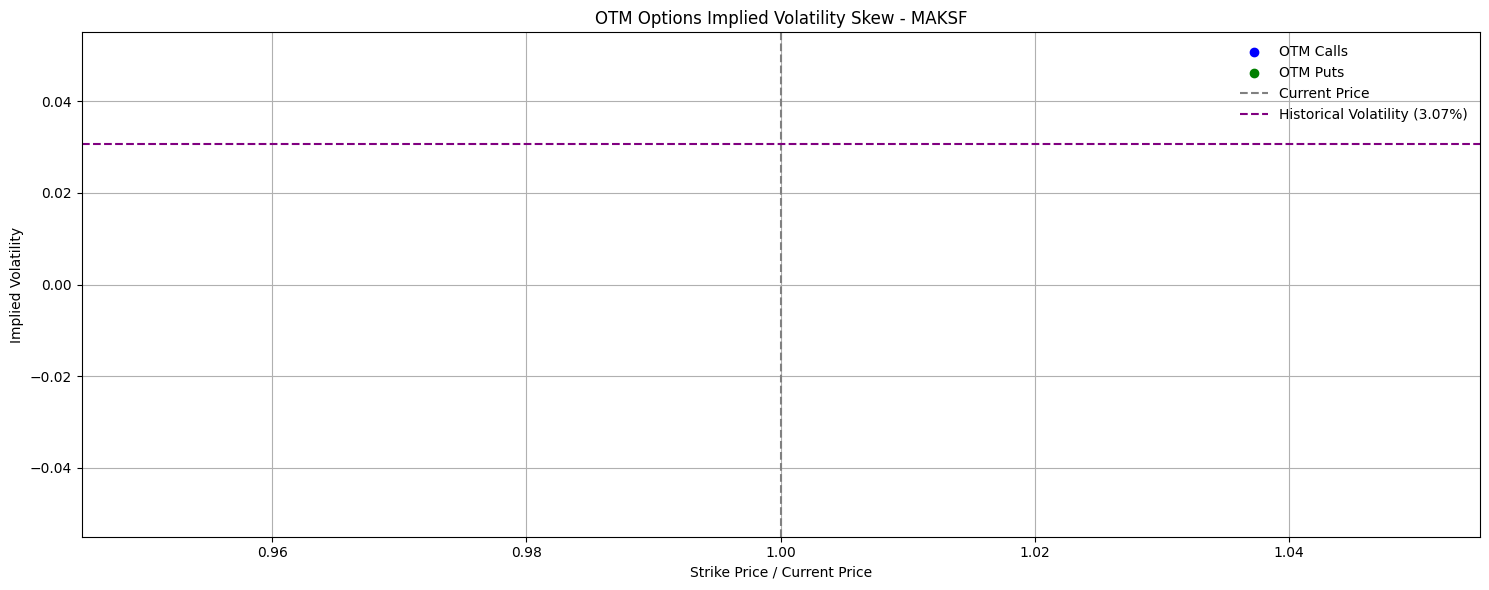

$DDCCF: possibly delisted; No price data found  (period=1d)


$DDCCF: possibly delisted; No price data found  (period=1d)


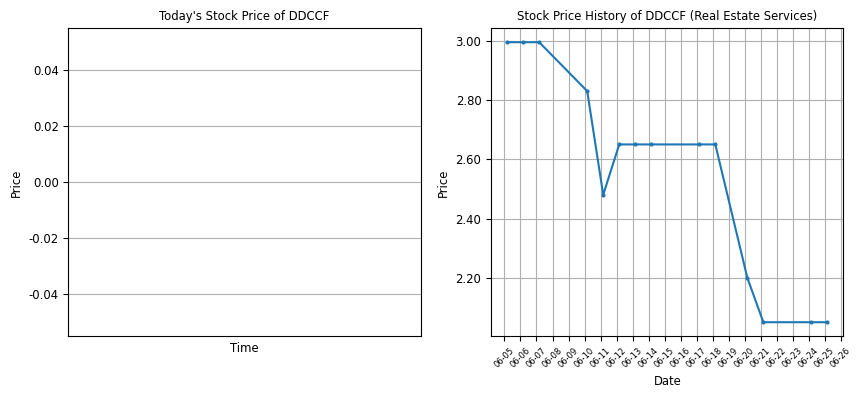

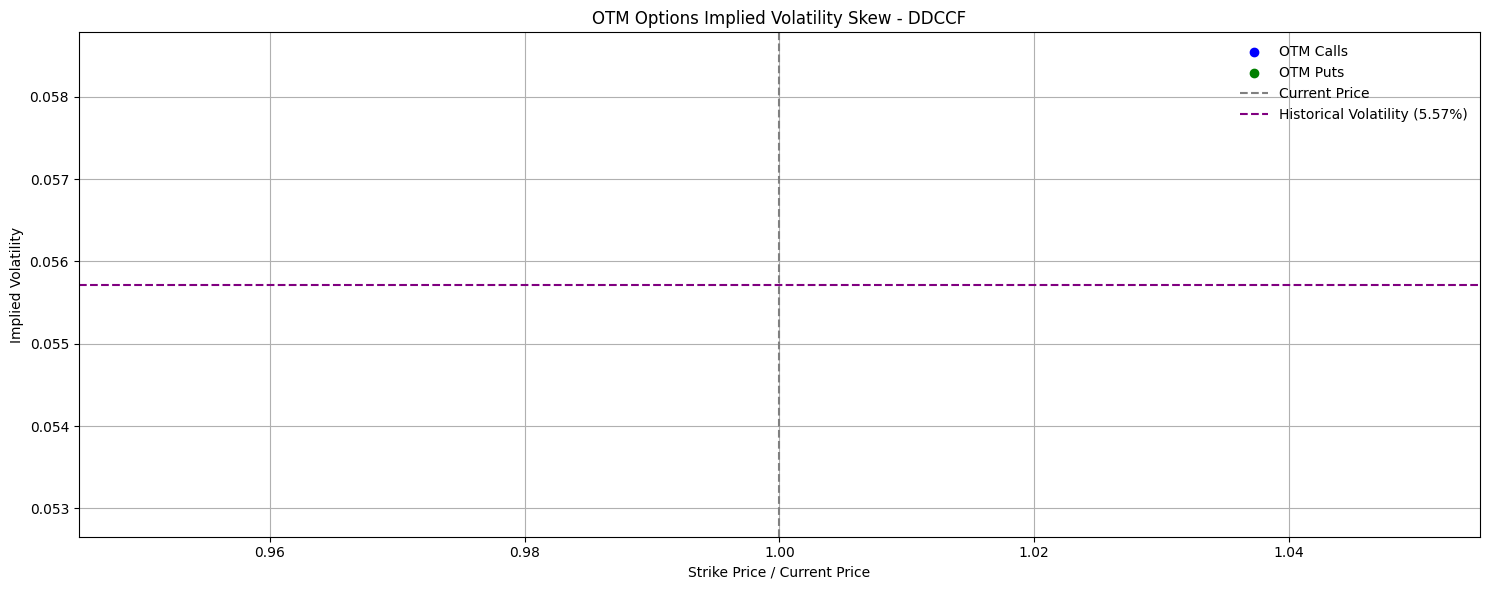

$AAFRF: possibly delisted; No price data found  (period=1d)


$AAFRF: possibly delisted; No price data found  (period=1d)


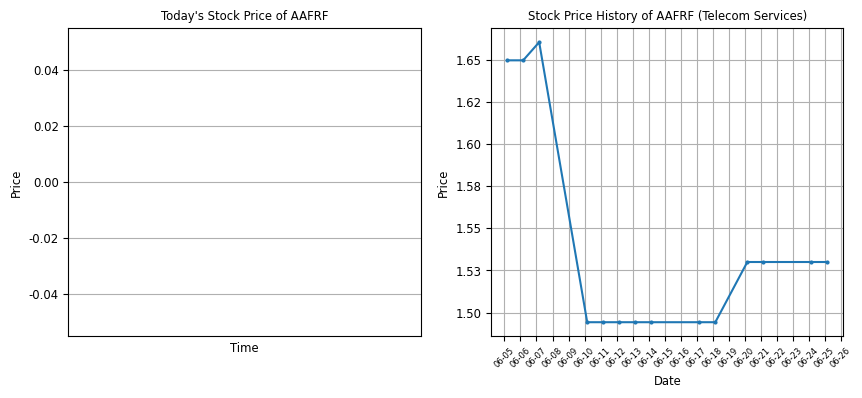

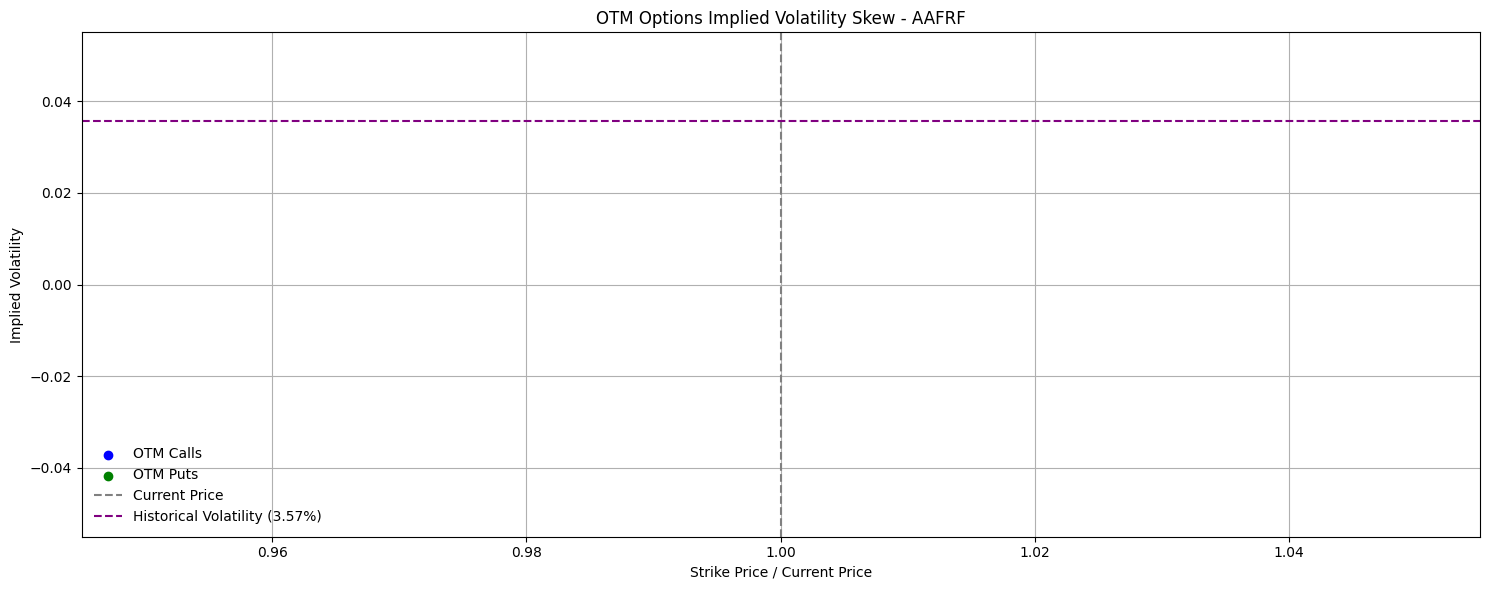

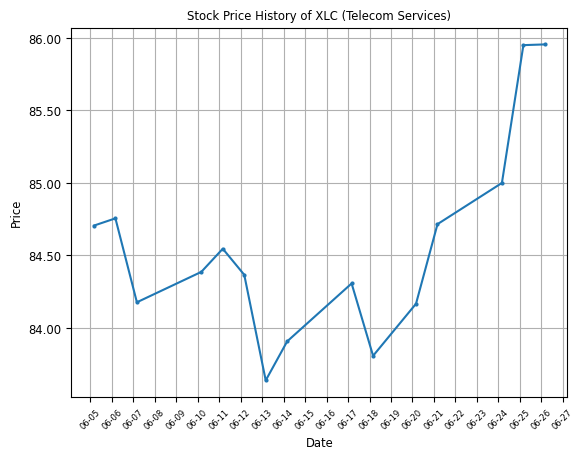

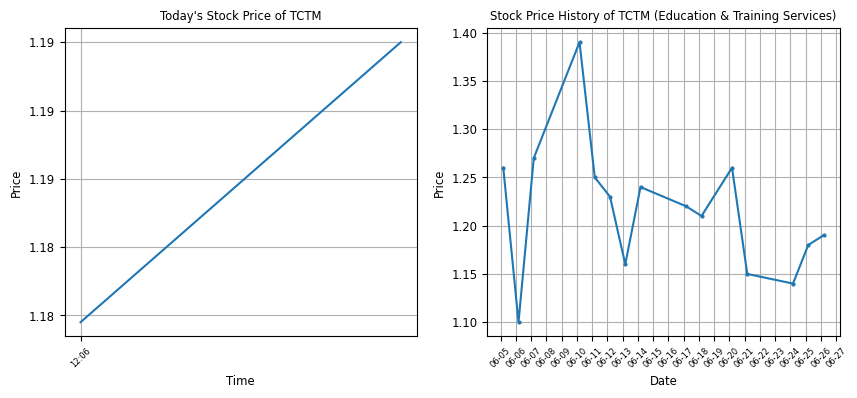

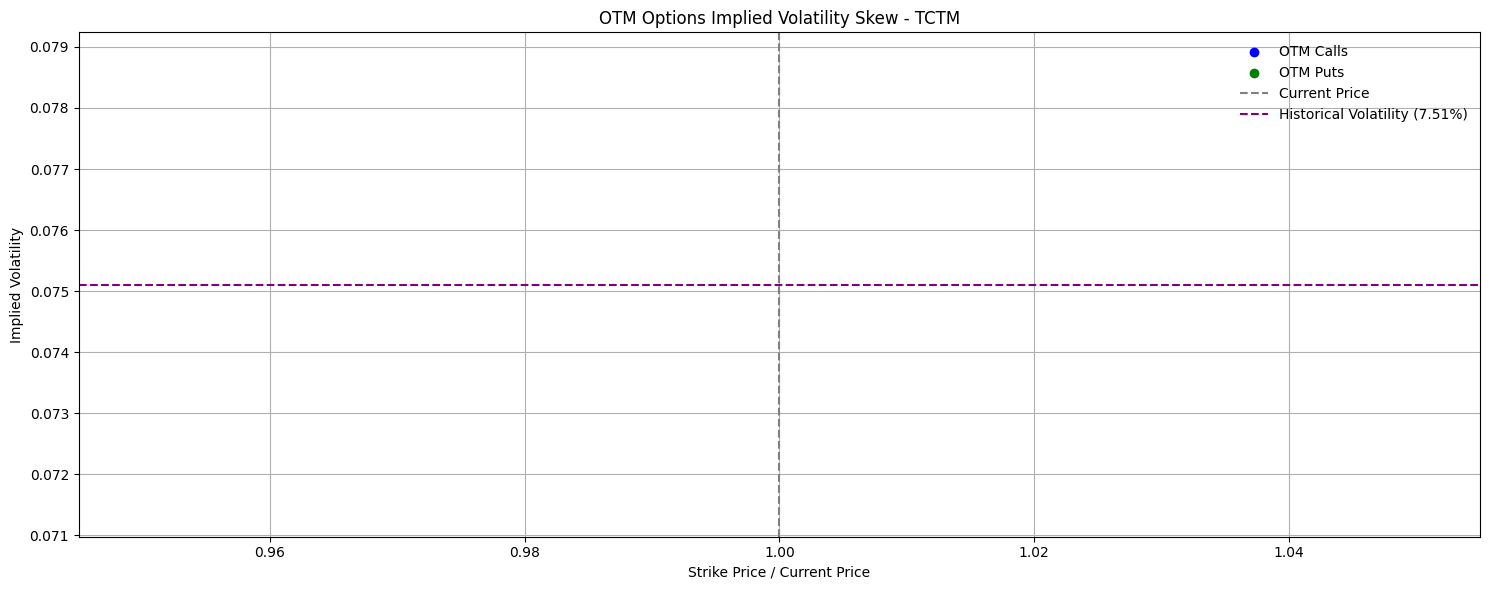

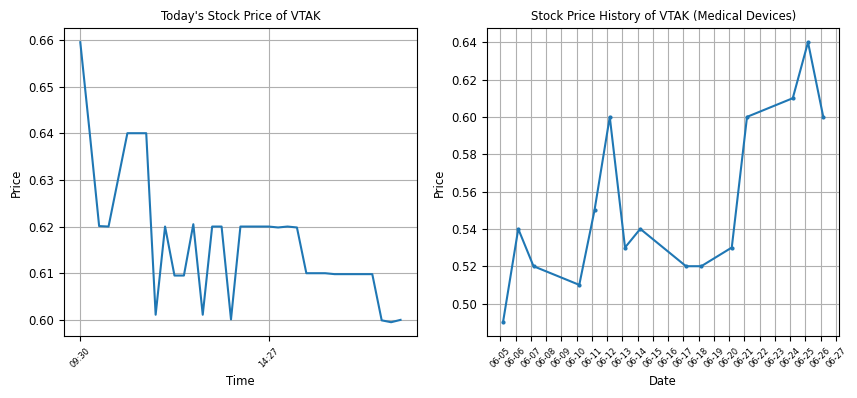

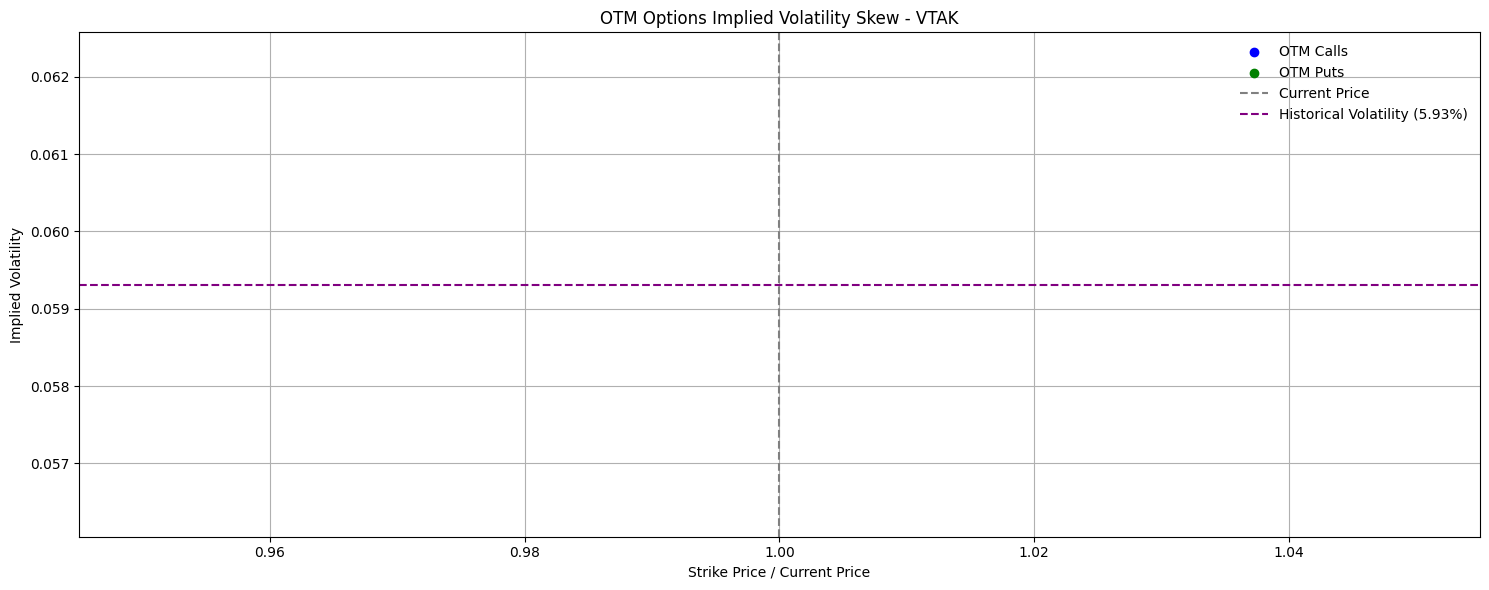

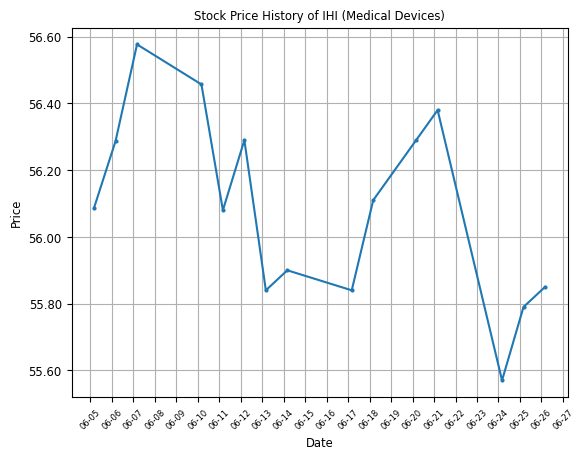

$WBNEF: possibly delisted; No price data found  (period=1d)


$WBNEF: possibly delisted; No price data found  (period=1d)


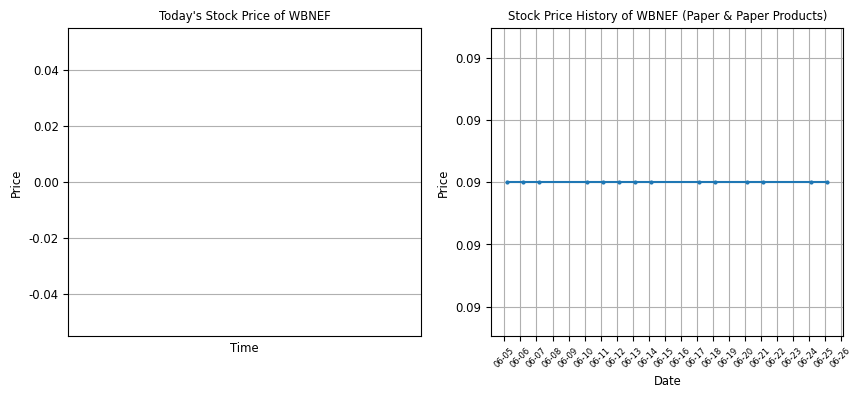

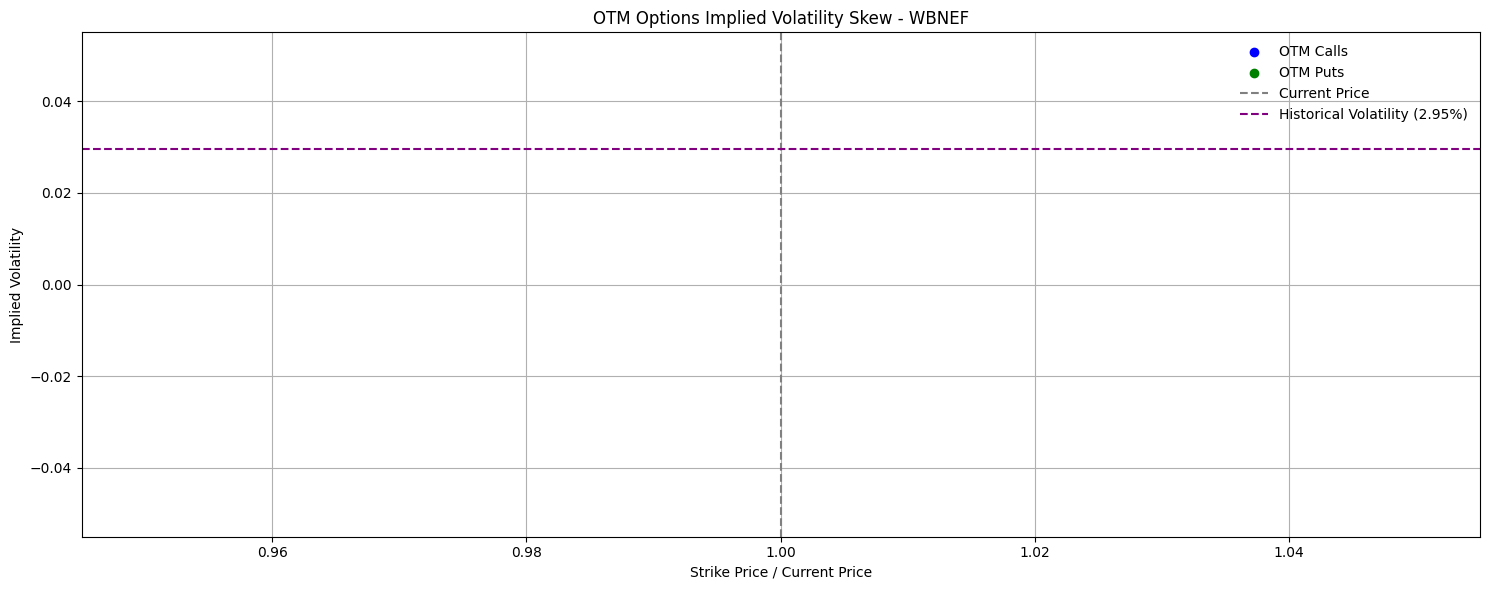

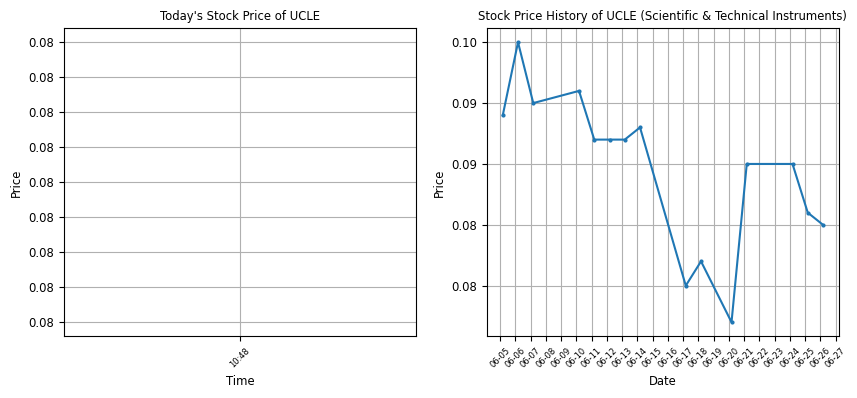

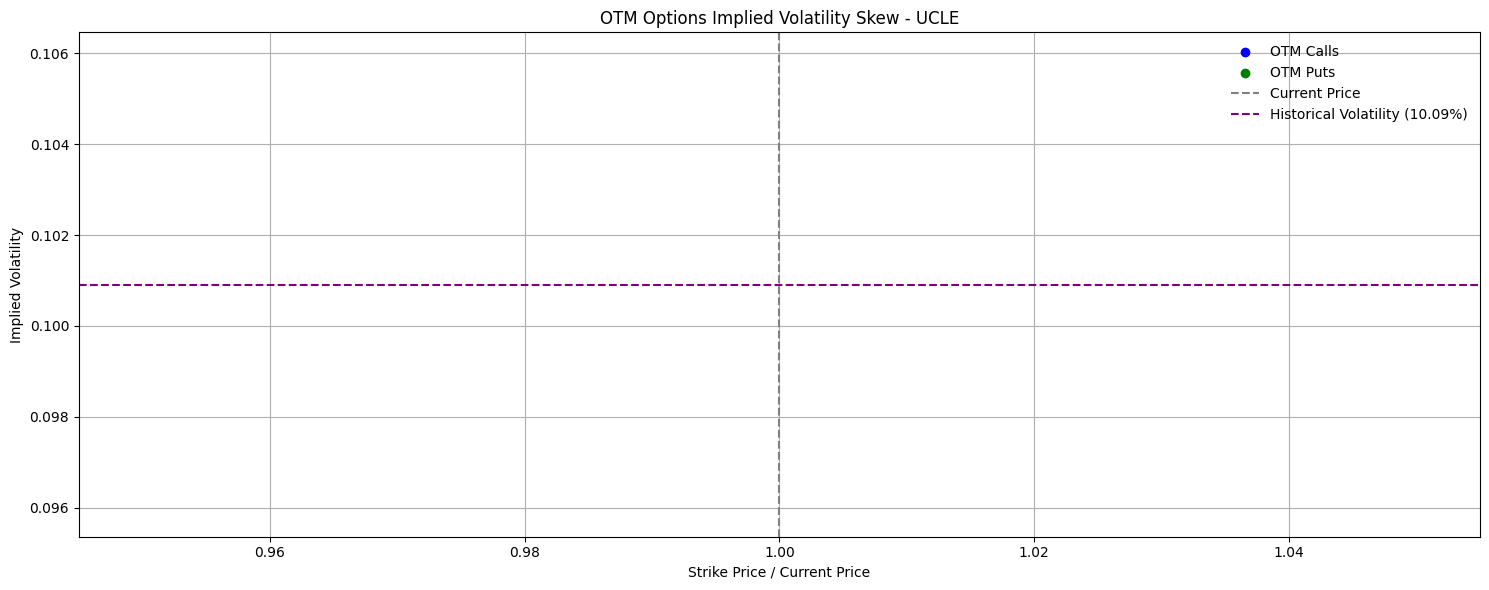

$VSBGF: possibly delisted; No price data found  (period=1d)


$VSBGF: possibly delisted; No price data found  (period=1d)


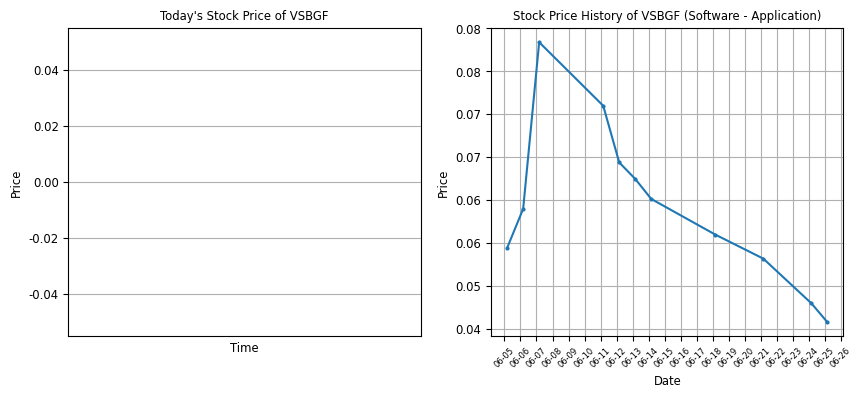

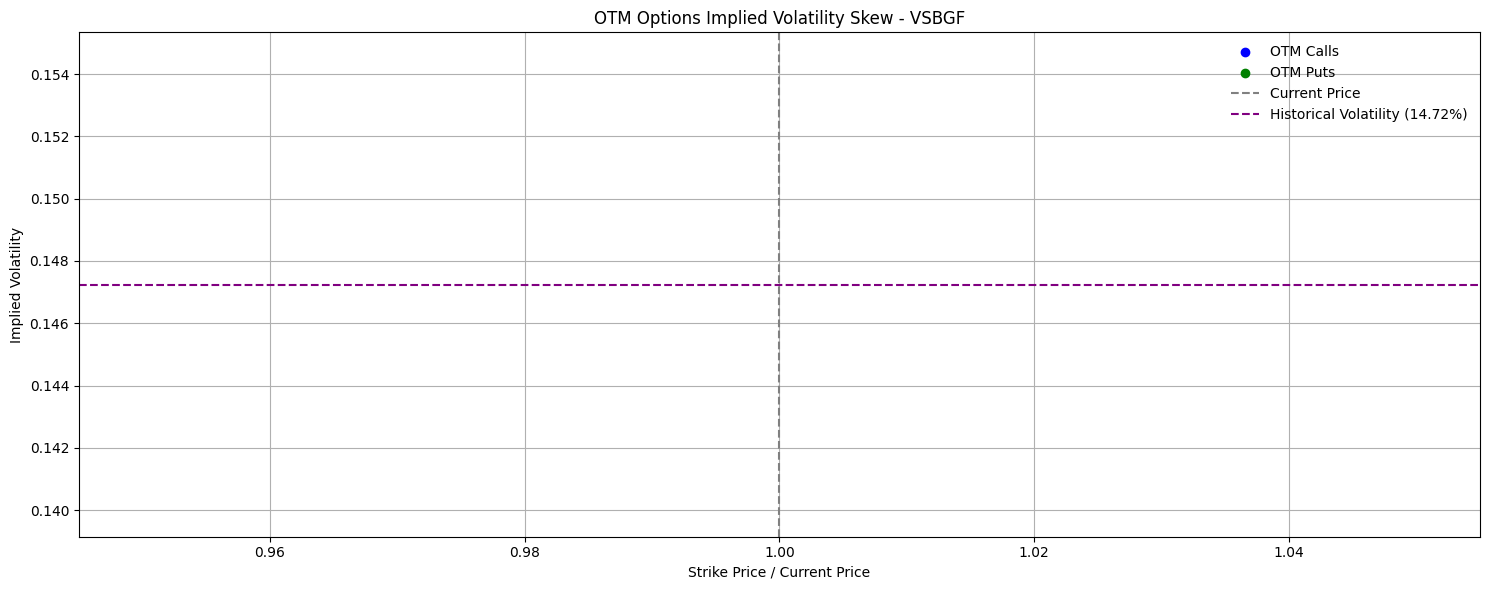

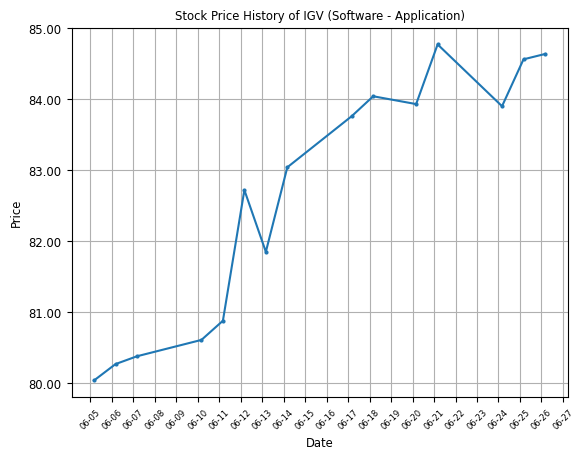

$SMGI: possibly delisted; No price data found  (period=1d)


$SMGI: possibly delisted; No price data found  (period=1d)


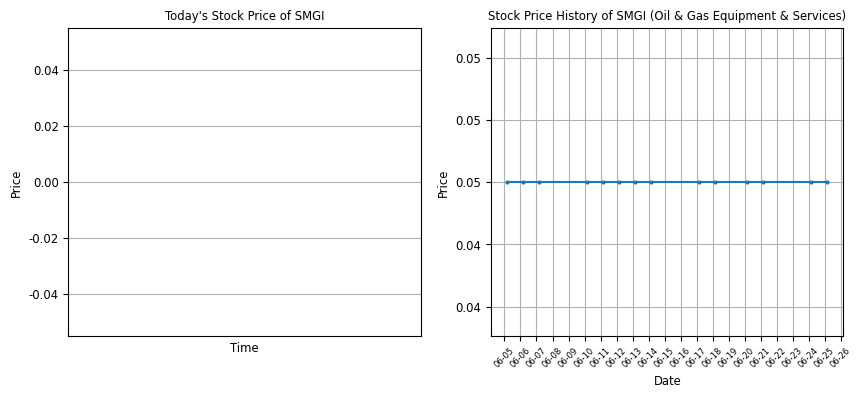

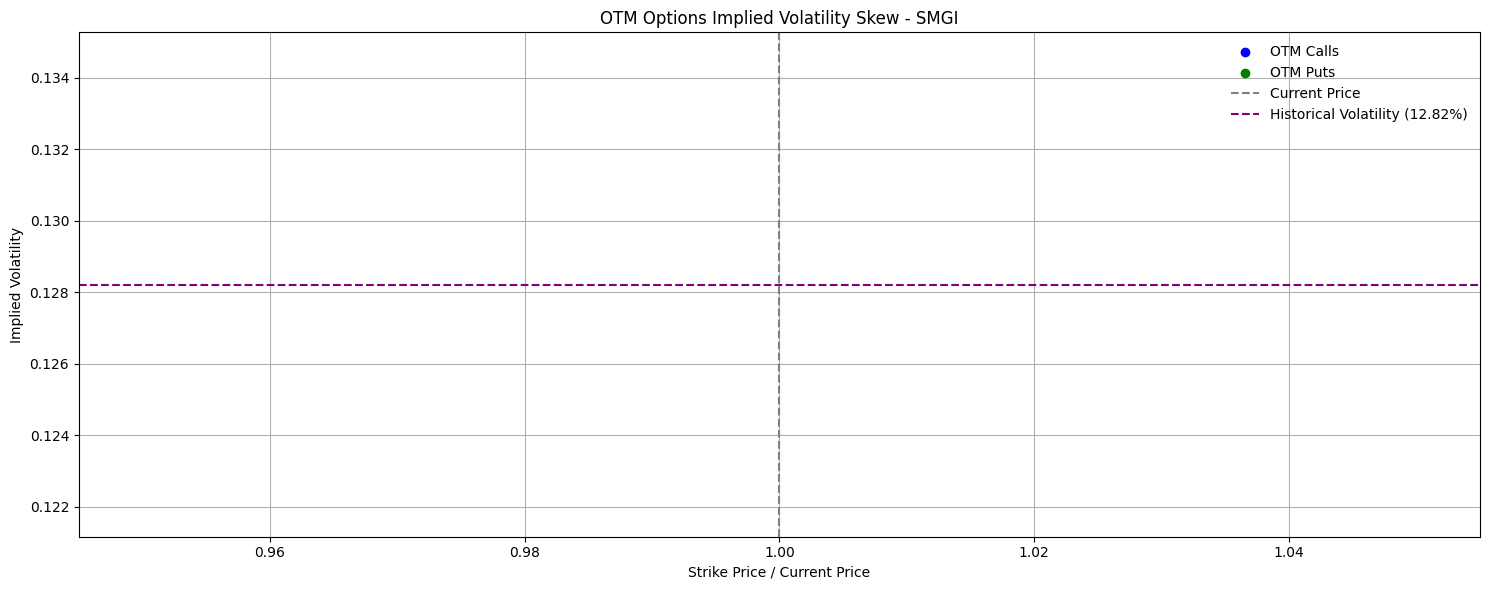

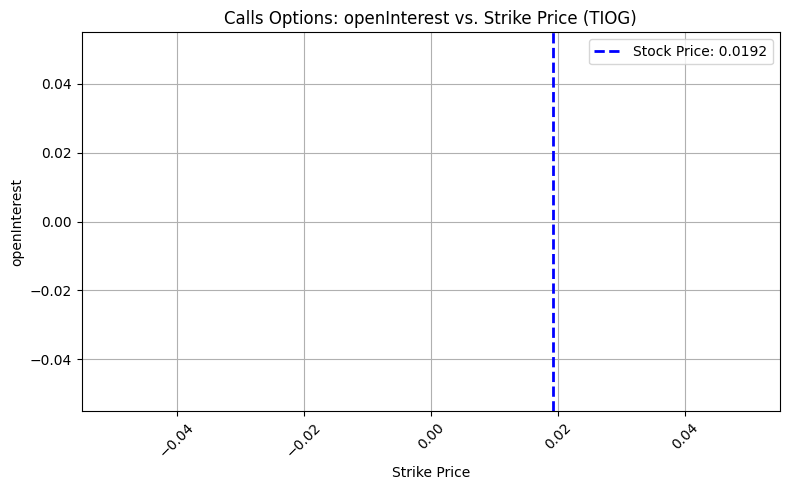

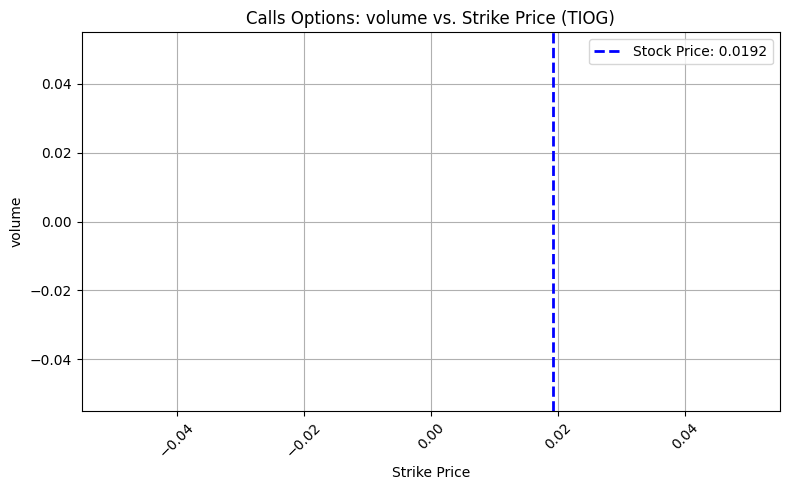

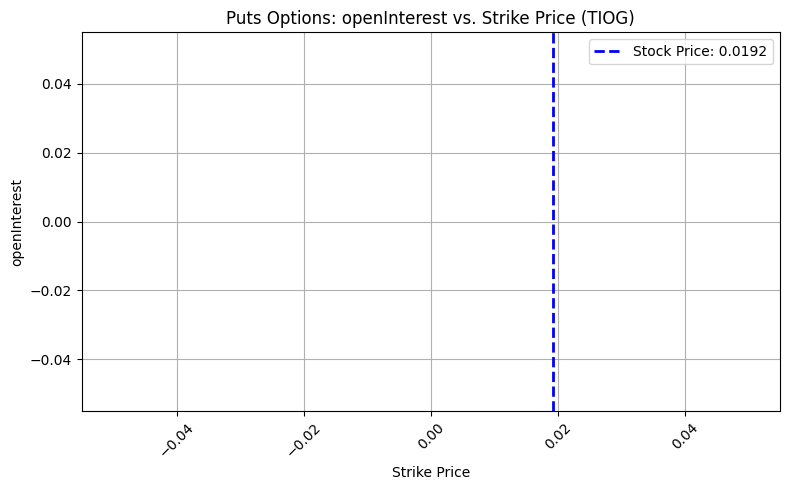

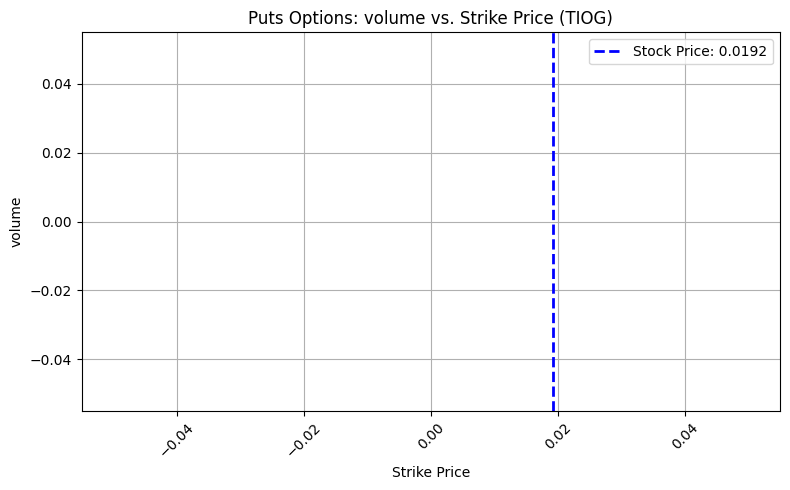

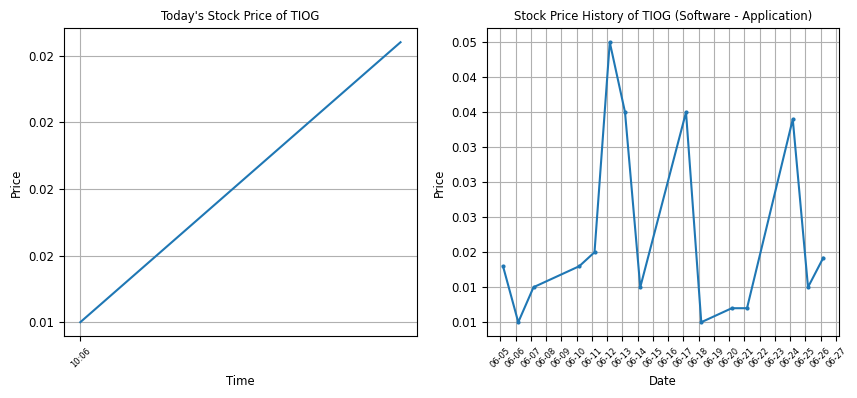

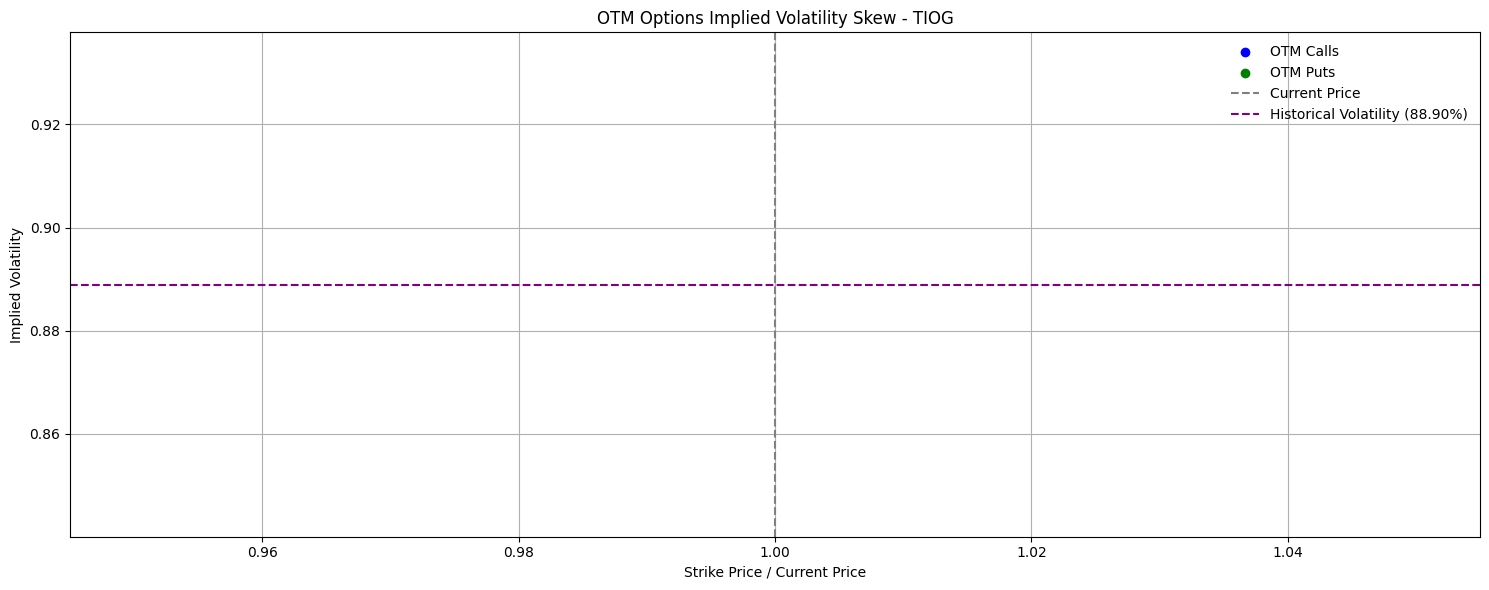

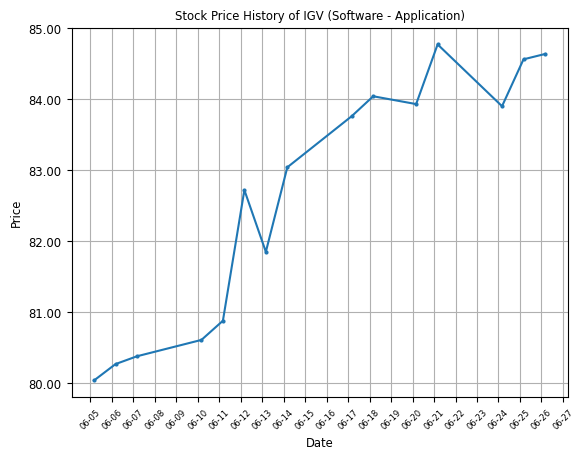

$BSHVF: possibly delisted; No price data found  (period=1d)


$BSHVF: possibly delisted; No price data found  (period=1d)


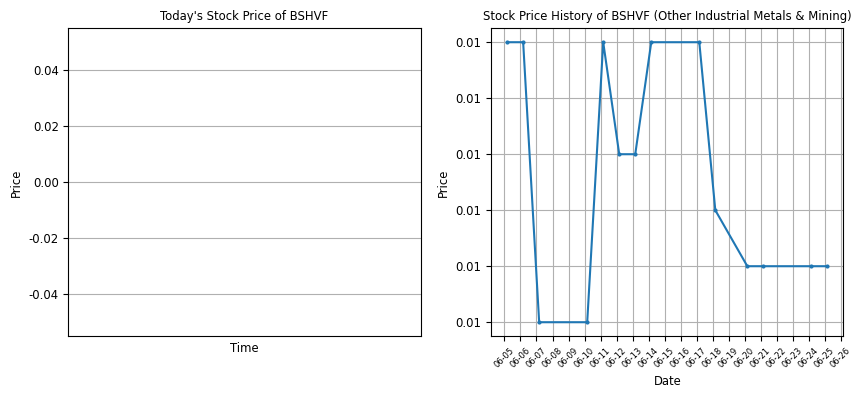

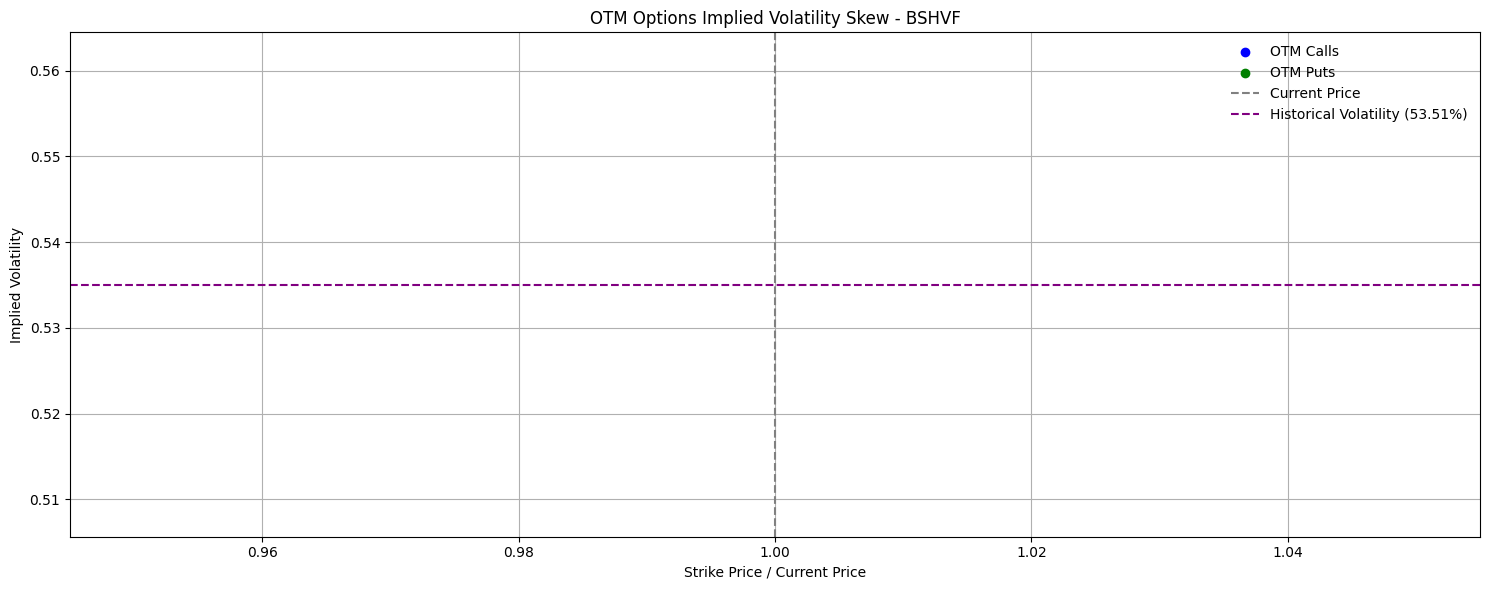

$BLLYF: possibly delisted; No price data found  (period=1d)


$BLLYF: possibly delisted; No price data found  (period=1d)


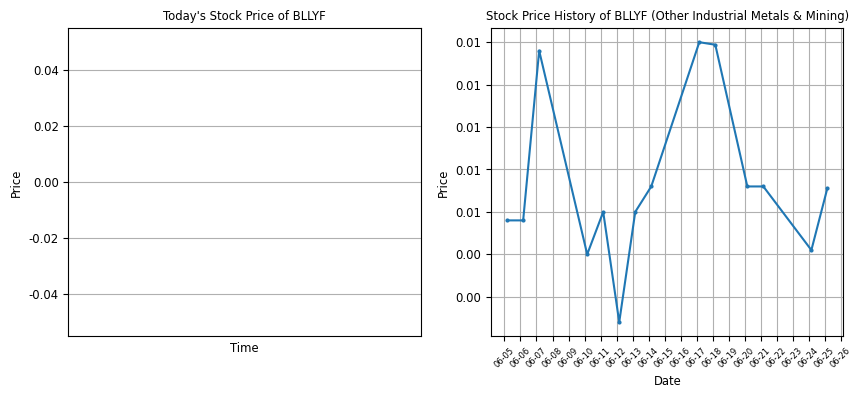

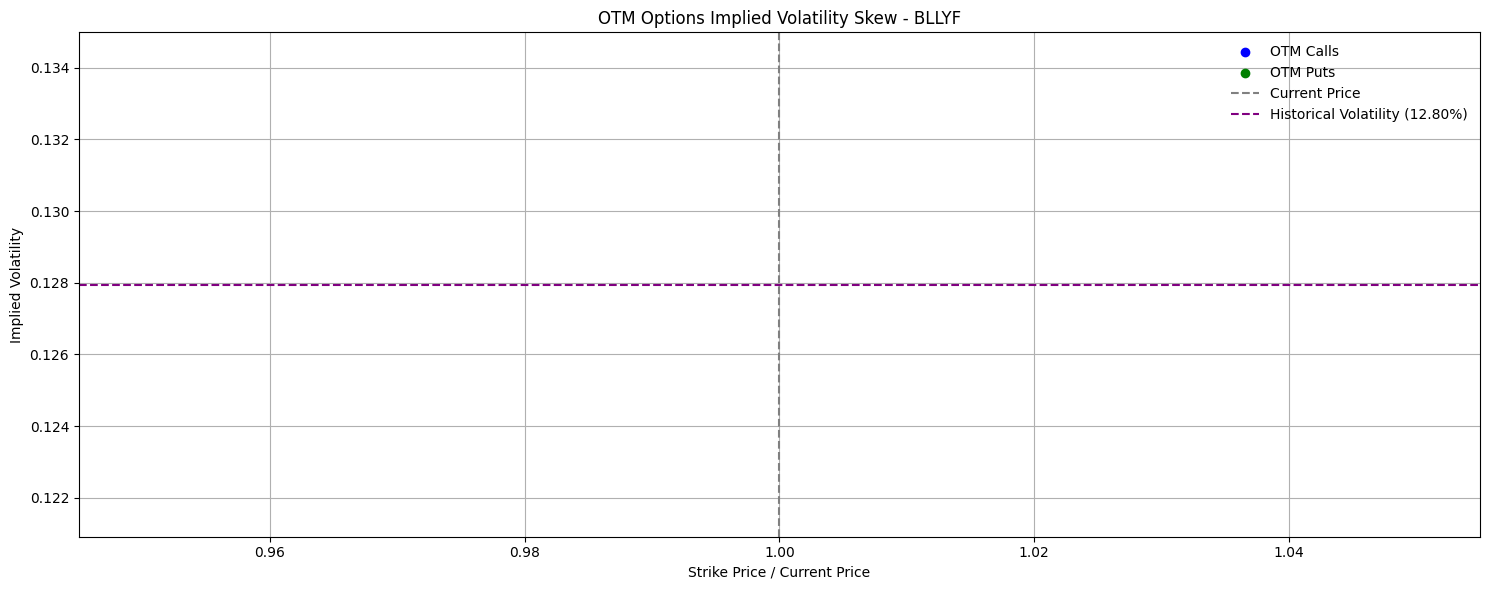

$ATGVF: possibly delisted; No price data found  (period=1d)


$ATGVF: possibly delisted; No price data found  (period=1d)


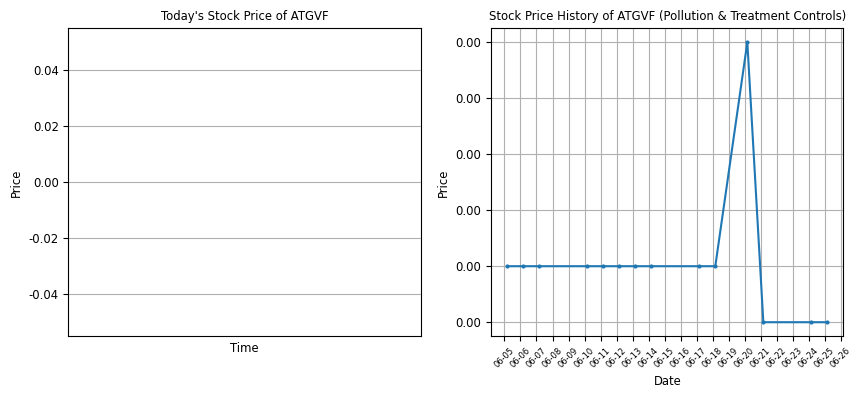

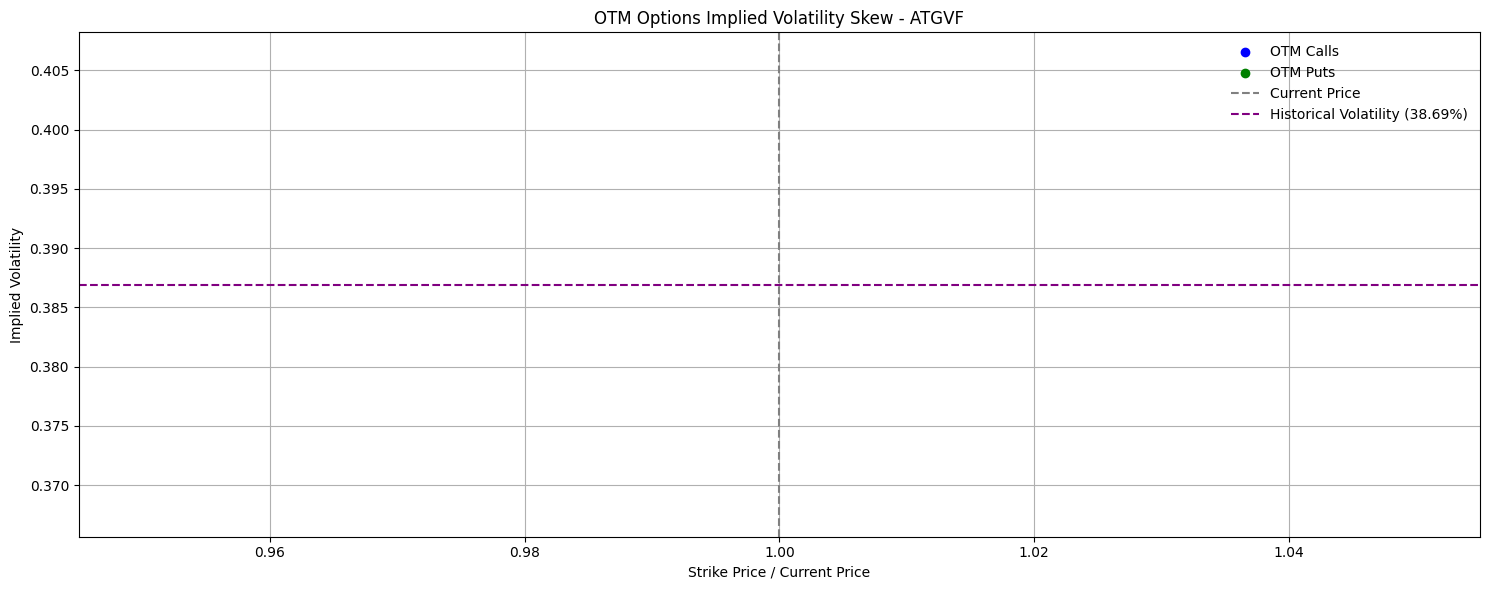

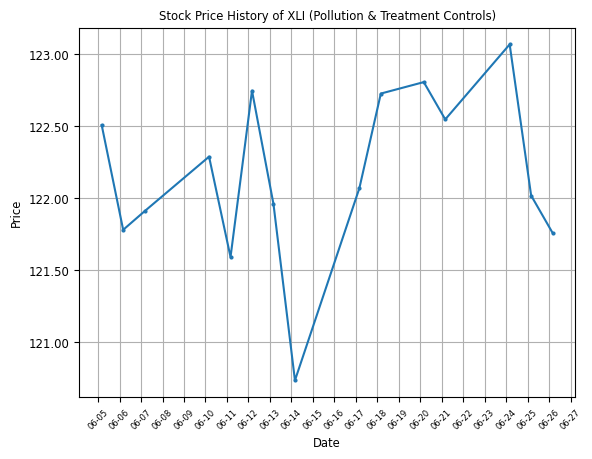

In [1]:
import setup
from imports import *
from scripts.analyze_stock import analyze_stock_options
from scripts.scrape_url import extract_table, process_earnings_table, convert_to_dataframe
from scripts.plotting_routines import plot_calls_puts_separately, plot_stock_history, plot_etf_historical_data, plot_iv_skew_otm_only

day = '2024-07-03'
date = datetime.strptime(day, '%Y-%m-%d')

# Set the time frame
end_date = date
start_date = date - timedelta(days=28)

ticker_data_list = []
base_url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day

offset = 0
while True:
    url = f"{base_url}&offset={offset}&size=100"
    print(url)
    table = extract_table(url)
    
    if table is None:
        break

    ticker_data_list = process_earnings_table(table, ticker_data_list)
    offset += 100  # Increment the offset by 100 for the next iteration

ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    dict, df = analyze_stock_options(ticker)

    plot_calls_puts_separately(df, ticker)

    plot_stock_history(ticker, start_date, end_date)

    plot_iv_skew_otm_only(dict, end_date, ticker)

    plot_etf_historical_data(ticker, start_date, end_date)

    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted